In [1]:
import pandas as pd

In [ ]:
care_df=pd.read_csv("/content/care.csv")

In [3]:
care_df.head(200)

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaN,t
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaN,t
...,...,...,...,...,...,...,...,...
195,718,36853,SCREENING,COLORECTAL CANCER,0.0,2024-05-21,NaN,t
196,719,37049,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t
197,720,37049,SCREENING,BREAST CANCER,0.0,2023-03-07,2025-03-06,t
198,723,38087,SCREENING,BREAST CANCER,0.0,2024-06-18,2026-06-18,t


In [4]:
care_df['next_care_dt'].isnull().sum()

np.int64(274)

In [5]:
care_df.describe()


,care_id,patient_id,msrmnt_value
count,425.000000,425.000000,425.000000
mean,740.538824,40486.637647,3.706824
std,152.633035,23750.134966,20.973075
min,474.000000,186.000000,0.000000
25%,608.000000,19954.000000,0.000000
50%,739.000000,40108.000000,0.000000
75%,872.000000,61119.000000,0.000000
max,1005.000000,81948.000000,171.000000


In [6]:
care_df.columns


Index(['care_id', 'patient_id', 'msrmnt_type', 'msrmnt_sub_type',
       'msrmnt_value', 'last_care_dt', 'next_care_dt', 'care_gap_ind'],
      dtype='object')

In [7]:
care_df['msrmnt_type'].unique()

array(['SCREENING', 'LAB TEST', 'MEDICATION ADHERENCE'], dtype=object)

In [224]:
care_df['msrmnt_sub_type'].unique()

array(['COLORECTAL CANCER', 'HbA1c', 'BREAST CANCER', 'HYPERTENSION',
       'SYSTOLIC BLOOD PRESSURE', 'CHOLESTEROL', 'DIABETES',
       'DIASTOLIC BLOOD PRESSURE'], dtype=object)

In [225]:
care_df.groupby('msrmnt_type')['msrmnt_sub_type'].unique()


,msrmnt_sub_type
msrmnt_type,
LAB TEST,"[HbA1c, SYSTOLIC BLOOD PRESSURE, DIASTOLIC BLO..."
MEDICATION ADHERENCE,"[HYPERTENSION, CHOLESTEROL, DIABETES]"
SCREENING,"[COLORECTAL CANCER, BREAST CANCER]"


In [ ]:
diagnosis_df=pd.read_csv("/content/diagnosis.csv")

In [227]:
diagnosis_df.head()

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,t
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,t
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,t
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,t
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,t


In [228]:
diagnosis_df.columns

Index(['diagnosis_id', 'patient_id', 'condition_name', 'condition_type',
       'condition_description', 'is_chronic'],
      dtype='object')

In [229]:
diagnosis_df['condition_name'].unique()

array(['CANCER', 'HYPERTENSION', 'DIABETES'], dtype=object)

In [230]:
diagnosis_df['condition_type'].unique()

array(['CHRONIC'], dtype=object)

In [231]:
diagnosis_df.isnull()

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3408,False,False,False,False,False,False
3409,False,False,False,False,False,False
3410,False,False,False,False,False,False
3411,False,False,False,False,False,False


In [232]:
diagnosis_df['condition_description'].unique()

array(['Cancer recent medical history',
       'Hypertension past medical history',
       'Diabetes mellitus past medical history',
       'Breast cancer past medical history',
       'High risk breast cancer past medical history',
       'Prostate cancer past medical history',
       'Colorectal cancer past medical history'], dtype=object)

In [233]:
diagnosis_df.groupby('condition_name')['condition_description'].unique()

,condition_description
condition_name,
CANCER,"[Cancer recent medical history, Breast cancer ..."
DIABETES,[Diabetes mellitus past medical history]
HYPERTENSION,[Hypertension past medical history]


In [234]:
diagnosis_df['diagnosis_id'].nunique()


3413

In [235]:
diagnosis_df.shape

(3413, 6)

In [236]:
patient_df=pd.read_csv("/content/patient.csv")

In [237]:
patient_df.head()

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f


In [238]:
patient_df['hot_spotter_identified_at'].value_counts()


,count
hot_spotter_identified_at,
0001-01-01,7473
2025-03-01,225
2025-01-01,202
2025-02-01,96
2025-02-06,1
2025-01-21,1
2025-02-11,1
2025-01-03,1


In [239]:
patient_df['hot_spotter_readmission_flag'].value_counts()

,count
hot_spotter_readmission_flag,
f,7997
t,3


In [240]:
patient_df['hot_spotter_chronic_flag'].value_counts()

,count
hot_spotter_chronic_flag,
f,7869
t,131


In [241]:
visit_df=pd.read_csv("/content/visit.csv")

In [242]:
visit_df.head()

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f


In [243]:
visit_df['visit_type'].value_counts()

,count
visit_type,
URGENT CARE,3328
ER,2431
INPATIENT,429


In [244]:
visit_df['prncpl_diag_nm'].value_counts()

,count
prncpl_diag_nm,
"Acute upper respiratory infection, unspecified",262
"Acute pharyngitis, unspecified",257
COVID-19,140
"Acute sinusitis, unspecified",129
Influenza due to other identified influenza virus with other respiratory manifestations,104
...,...
"Intestinal adhesions [bands], unspecified as to partial versus complete obstruction",1
"Partial intestinal obstruction, unspecified as to cause",1
"Unspecified fracture of upper end of right humerus, initial encounter for closed fracture",1


In [245]:
combined_df = care_df.merge(diagnosis_df, on='patient_id', how='inner') \
                 .merge(patient_df, on='patient_id', how='inner') \
                 .merge(visit_df, on='patient_id', how='inner')


In [246]:
risk_df=pd.read_csv("/content/risk.csv")

In [247]:
risk_df.shape

(8000, 2)

In [248]:
combined_df.shape

(1189, 25)

In [249]:
risk_df

,patient_id,risk_score
0,291,0.51
1,306,0.61
2,310,11.70
3,315,0.65
4,318,1.08
...,...,...
7995,82117,0.49
7996,82120,0.19
7997,82130,0.62
7998,82152,0.88


In [250]:
patient_df[patient_df['patient_id']==1]

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
7999,1,55,0001-01-01,f,f


In [251]:
patient_df

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f
...,...,...,...,...,...
7995,82117,45,0001-01-01,f,f
7996,82120,12,0001-01-01,f,f
7997,82130,49,0001-01-01,f,f
7998,82152,54,0001-01-01,f,f


In [252]:
diagnosis_df['patient_id'].nunique()

2617

In [253]:
diagnosis_df.isnull()

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3408,False,False,False,False,False,False
3409,False,False,False,False,False,False
3410,False,False,False,False,False,False
3411,False,False,False,False,False,False


In [254]:
diagnosis_df['diagnosis_id'].nunique()

3413

In [255]:
care_df.nunique()

,0
care_id,425
patient_id,320
msrmnt_type,3
msrmnt_sub_type,8
msrmnt_value,29
last_care_dt,297
next_care_dt,93
care_gap_ind,1


numeric_df = care_df[care_df['msrmnt_value'] != 0]
screening_df = care_df[care_df['msrmnt_value'] == 0]

In [256]:
# # Pivot so each measurement type becomes a column
# agg_numeric = (
#     numeric_df
#     .pivot_table(index='patient_id',
#                  columns='msrmnt_sub_type',
#                  values='msrmnt_value',
#                  aggfunc='mean')
#     .reset_index()
# )

# # Optional: rename columns for clarity
# agg_numeric.columns = [col.lower().replace(' ', '_') for col in agg_numeric.columns]


In [257]:
# agg_screening = (
#     screening_df
#     .groupby('patient_id')['msrmnt_sub_type']
#     .nunique()
#     .reset_index(name='num_screenings_done')
# )


In [258]:
# patient_features = pd.merge(agg_numeric, agg_screening, on='patient_id', how='outer')


In [259]:
# patient_features

In [260]:
# # Replace missing numeric values with median
# for col in ['hba1c', 'systolic_blood_pressure', 'diastolic_blood_pressure']:
#     if col in patient_features.columns:
#         patient_features[col].fillna(patient_features[col].median(), inplace=True)

# # Replace missing categorical/numeric counts with 0
# patient_features.fillna(0, inplace=True)


In [261]:
# patient_features

In [262]:
# diag_features = diagnosis_df.groupby('patient_id')['condition_name'].nunique().reset_index(name='num_conditions')

In [263]:
# diag_features

In [264]:
# visit_features = visit_df.groupby('patient_id')['visit_id'].nunique().reset_index(name='num_visits')

In [265]:
# visit_features

In [266]:
# care_patients = set(care_df['patient_id'].unique())
# diag_patients = set(diagnosis_df['patient_id'].unique())
# visit_patients = set(visit_df['patient_id'].unique())
# main_patients = set(patient_df['patient_id'].unique())

# # Union of all patients
# all_patients = care_patients.union(diag_patients).union(visit_patients).union(main_patients)
# print("Total unique patients:", len(all_patients))


In [267]:
# patient_features = pd.DataFrame({'patient_id': list(all_patients)})


In [268]:
# import pandas as pd

# # -----------------------------
# # 🩺 Step 1: Care Data
# # -----------------------------
# numeric_df = care_df[care_df['msrmnt_value'] != 0]
# screening_df = care_df[care_df['msrmnt_value'] == 0]

# agg_numeric = (
#     numeric_df
#     .pivot_table(index='patient_id', columns='msrmnt_sub_type', values='msrmnt_value', aggfunc='mean')
#     .reset_index()
# )
# agg_numeric.columns = [col.lower().replace(' ', '_') for col in agg_numeric.columns]

# agg_screening = (
#     screening_df
#     .groupby('patient_id')['msrmnt_sub_type']
#     .nunique()
#     .reset_index(name='num_screenings_done')
# )

# # -----------------------------
# # 🧾 Step 2: Diagnosis Data
# # -----------------------------
# diag_features = (
#     diagnosis_df.groupby('patient_id')
#     .agg(num_conditions=('condition_name', 'nunique'))
#     .reset_index()
# )

# if 'is_chronic' in diagnosis_df.columns:
#     diag_features['num_chronic_conditions'] = (
#         diagnosis_df.groupby('patient_id')['is_chronic']
#         .apply(lambda x: (x == 't').sum())
#         .values
#     )

# # -----------------------------
# # 🏥 Step 3: Visit Data
# # -----------------------------
# visit_features = (
#     visit_df.groupby('patient_id')
#     .agg(num_visits=('visit_id', 'nunique'),
#          num_er_visits=('visit_type', lambda x: (x == 'ER').sum()),
#          num_inpatient_visits=('visit_type', lambda x: (x == 'INPATIENT').sum()))
#     .reset_index()
# )

# # -----------------------------
# # 👤 Step 4: Patient Demographics
# # -----------------------------
# patient_base = patient_df[['patient_id', 'age', 'hot_spotter_readmission_flag', 'hot_spotter_chronic_flag']].copy()

# for col in ['hot_spotter_readmission_flag', 'hot_spotter_chronic_flag']:
#     if col in patient_base.columns:
#         patient_base[col] = patient_base[col].map({'t': 1, 'f': 0})

# # -----------------------------
# # 🧠 Step 5: Combine all patients
# # -----------------------------
# all_patient_ids = pd.Series(
#     list(
#         set(care_df['patient_id'])
#         | set(diagnosis_df['patient_id'])
#         | set(visit_df['patient_id'])
#         | set(patient_df['patient_id'])
#     ),
#     name='patient_id'
# )

# patient_features = pd.DataFrame(all_patient_ids)

# # -----------------------------
# # ⚙️ Step 6: Merge all features
# # -----------------------------
# patient_features = (
#     patient_features
#     .merge(agg_numeric, on='patient_id', how='left')
#     .merge(agg_screening, on='patient_id', how='left')
#     .merge(diag_features, on='patient_id', how='left')
#     .merge(visit_features, on='patient_id', how='left')
#     .merge(patient_base, on='patient_id', how='left')
# )

# # -----------------------------
# # 🧩 Step 7: Fill Missing Values
# # -----------------------------
# for col in ['num_screenings_done', 'num_conditions', 'num_chronic_conditions',
#             'num_visits', 'num_er_visits', 'num_inpatient_visits']:
#     if col in patient_features.columns:
#         patient_features[col].fillna(0, inplace=True)

# for col in ['hba1c', 'systolic_blood_pressure', 'diastolic_blood_pressure']:
#     if col in patient_features.columns:
#         patient_features[col].fillna(patient_features[col].median(), inplace=True)

# if 'age' in patient_features.columns:
#     patient_features['age'].fillna(patient_features['age'].median(), inplace=True)

# # -----------------------------
# # ✅ Step 8: Final Check
# # -----------------------------
# print("Final shape:", patient_features.shape)
# display(patient_features.head())


In [269]:
# patient_features.shape

In [270]:
# patient_features

In [271]:
# risk_df

In [272]:
# merged_df = pd.merge(care_df, risk_df, on='patient_id', how='inner')


In [273]:
# merged_df

In [274]:
# merged_df.describe()

In [275]:
# risk_df

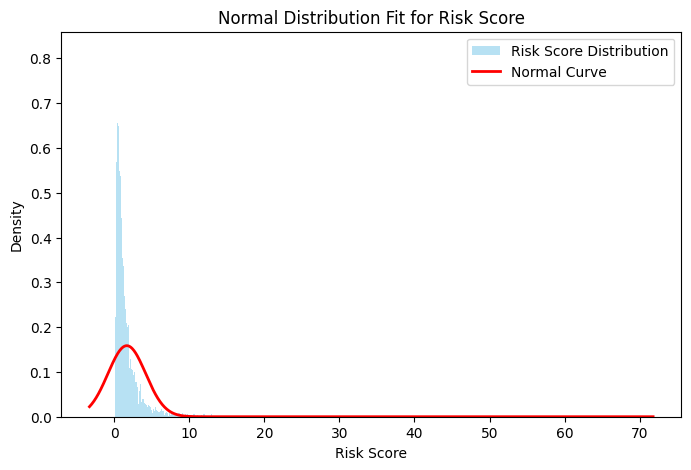

In [276]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Drop NaN values from risk_score if any
data = risk_df['risk_score'].dropna()

# Compute mean and standard deviation
mu, std = data.mean(), data.std()

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=1000, density=True, alpha=0.6, color='skyblue', label='Risk Score Distribution')

# Plot normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Normal Curve')

# Labels
plt.title('Normal Distribution Fit for Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [277]:
merged_df = pd.merge(visit_df, risk_df, on='patient_id', how='inner')

In [278]:
merged_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,risk_score
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1.54
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1.54
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1.54
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f,1.54
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1.54
...,...,...,...,...,...,...,...,...,...,...
6183,15393,URGENT CARE,82060,2024-05-03,2024-05-03,8888-12-31,NaN,"Cough, unspecified",f,2.17
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f,3.81
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f,3.81
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,0.49


In [279]:
merged_df.describe()

,visit_id,patient_id,prmry_proc_nm,risk_score
count,6188.000000,6188.000000,0.0,6188.000000
mean,11577.625404,40537.360052,NaN,2.980354
std,2228.882187,23901.548607,NaN,4.935281
min,7698.000000,80.000000,NaN,0.130000
25%,9656.750000,20056.250000,NaN,0.780000
50%,11581.500000,39697.000000,NaN,1.570000
75%,13490.250000,60979.500000,NaN,3.390000
max,15398.000000,82130.000000,NaN,68.380000


In [280]:
merged_df = pd.merge(diagnosis_df, risk_df, on='patient_id', how='inner')

In [281]:
merged_df

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic,risk_score
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,t,1.83
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,t,5.52
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,t,2.46
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,t,0.64
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,t,1.32
...,...,...,...,...,...,...,...
3408,7487,62128,HYPERTENSION,CHRONIC,Hypertension past medical history,t,3.25
3409,7490,310,DIABETES,CHRONIC,Diabetes mellitus past medical history,t,11.70
3410,7492,59187,HYPERTENSION,CHRONIC,Hypertension past medical history,t,3.94
3411,7493,73878,DIABETES,CHRONIC,Diabetes mellitus past medical history,t,0.76


In [282]:
merged_df.describe()

,diagnosis_id,patient_id,risk_score
count,3413.000000,3413.000000,3413.000000
mean,5393.122473,40314.639613,3.182353
std,1223.068493,23870.276508,4.042102
min,3241.000000,19.000000,0.240000
25%,4333.000000,19587.000000,1.280000
50%,5418.000000,39232.000000,2.120000
75%,6449.000000,60975.000000,3.600000
max,7494.000000,82060.000000,68.380000


In [283]:
visit_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
...,...,...,...,...,...,...,...,...,...
6183,15393,URGENT CARE,82060,2024-05-03,2024-05-03,8888-12-31,NaN,"Cough, unspecified",f
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f


In [284]:
visit_df['prncpl_diag_nm'].nunique()

1430

In [285]:
visit_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
...,...,...,...,...,...,...,...,...,...
6183,15393,URGENT CARE,82060,2024-05-03,2024-05-03,8888-12-31,NaN,"Cough, unspecified",f
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f


In [286]:
diagnosis_df

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,t
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,t
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,t
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,t
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,t
...,...,...,...,...,...,...
3408,7487,62128,HYPERTENSION,CHRONIC,Hypertension past medical history,t
3409,7490,310,DIABETES,CHRONIC,Diabetes mellitus past medical history,t
3410,7492,59187,HYPERTENSION,CHRONIC,Hypertension past medical history,t
3411,7493,73878,DIABETES,CHRONIC,Diabetes mellitus past medical history,t


In [287]:
patient_df

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f
...,...,...,...,...,...
7995,82117,45,0001-01-01,f,f
7996,82120,12,0001-01-01,f,f
7997,82130,49,0001-01-01,f,f
7998,82152,54,0001-01-01,f,f


In [288]:
patient_df[patient_df['hot_spotter_chronic_flag']=='t']

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
192,2265,64,2025-02-01,f,t
227,2624,59,2025-02-01,f,t
280,3264,56,2025-01-01,f,t
389,4252,62,2025-02-01,f,t
433,4623,55,2025-01-01,f,t
...,...,...,...,...,...
7567,78284,56,2025-01-01,f,t
7727,79535,64,2025-01-01,f,t
7789,79189,63,2025-02-01,f,t
7827,80668,48,2025-01-01,f,t


In [289]:
risk_df[risk_df['patient_id']==2624]

,patient_id,risk_score
227,2624,5.52


In [290]:
# Step 1: Get patient IDs where hot_spotter_chronic_flag == 't'
chronic_patients = patient_df.loc[
    patient_df['hot_spotter_chronic_flag'] == 't',
    'patient_id'
]

# Step 2: Filter risk_df for those patient IDs
chronic_risk_scores = risk_df[risk_df['patient_id'].isin(chronic_patients)]

# Step 3 (optional): Display only relevant columns
chronic_risk_scores = chronic_risk_scores[['patient_id', 'risk_score']]

# Step 4: See result
print(chronic_risk_scores)


      patient_id  risk_score
192         2265        7.03
227         2624        5.52
280         3264        4.31
389         4252        1.27
433         4623        2.90
...          ...         ...
7567       78284        1.66
7727       79535        2.13
7789       79189        2.93
7827       80668        9.29
7924       80405        0.73

[131 rows x 2 columns]


In [291]:
chronic_risk_scores.describe()

,patient_id,risk_score
count,131.000000,131.000000
mean,40177.122137,6.557328
std,23024.339199,8.428858
min,186.000000,0.640000
25%,19673.500000,2.135000
50%,39280.000000,3.820000
75%,61779.000000,7.560000
max,80668.000000,68.380000


In [292]:
patient_df[patient_df['hot_spotter_readmission_flag']=='t']

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
437,4650,15,0001-01-01,t,f
4662,48236,52,2025-02-01,t,t
6602,68611,55,0001-01-01,t,f


In [293]:
chronic_patients = patient_df.loc[
    patient_df['hot_spotter_readmission_flag'] == 't',
    'patient_id'
]

# Step 2: Filter risk_df for those patient IDs
chronic_risk_scores = risk_df[risk_df['patient_id'].isin(chronic_patients)]

# Step 3 (optional): Display only relevant columns
chronic_risk_scores = chronic_risk_scores[['patient_id', 'risk_score']]

# Step 4: See result
print(chronic_risk_scores)

      patient_id  risk_score
437         4650        1.16
4662       48236       26.73
6602       68611        1.00


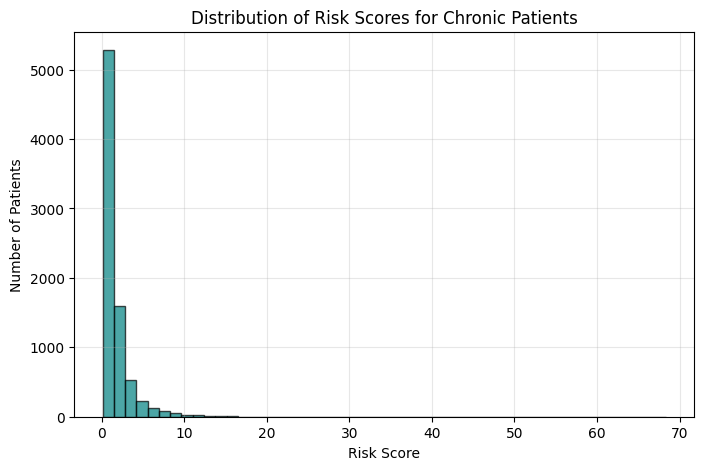

In [294]:
import matplotlib.pyplot as plt

# Assuming you already have chronic_risk_scores from earlier
plt.figure(figsize=(8,5))
plt.hist(risk_df['risk_score'], bins=50, color='teal', alpha=0.7, edgecolor='black')

# Labels and title
plt.title('Distribution of Risk Scores for Chronic Patients')
plt.xlabel('Risk Score')
plt.ylabel('Number of Patients')
plt.grid(alpha=0.3)
plt.show()


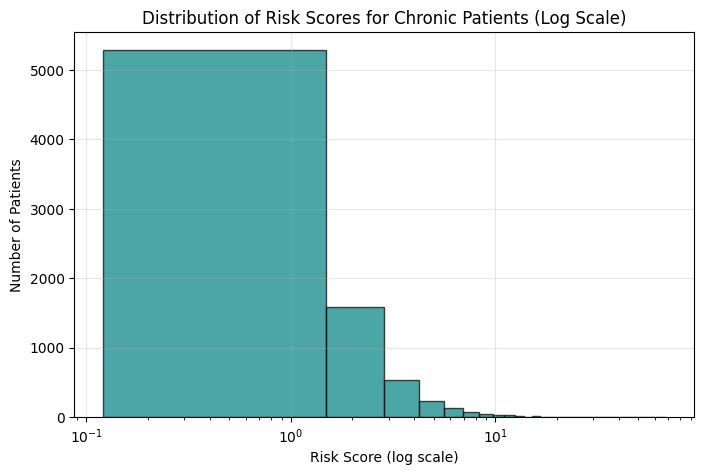

In [295]:
plt.figure(figsize=(8,5))
plt.hist(risk_df['risk_score'], bins=50, color='teal', alpha=0.7, edgecolor='black')
plt.xscale('log')  # Log scale helps visualize wide range
plt.title('Distribution of Risk Scores for Chronic Patients (Log Scale)')
plt.xlabel('Risk Score (log scale)')
plt.ylabel('Number of Patients')
plt.grid(alpha=0.3)
plt.show()


<Axes: xlabel='risk_score'>

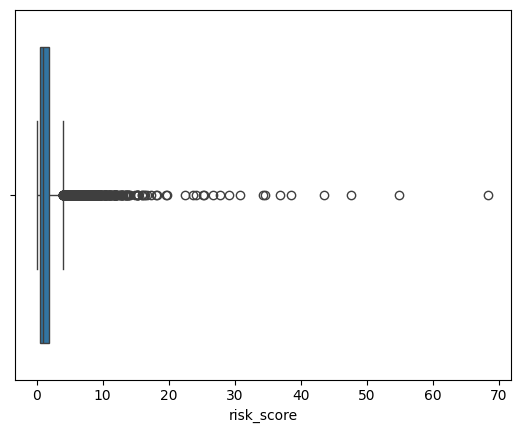

In [296]:
import seaborn as sns
sns.boxplot(x=risk_df['risk_score'])


In [297]:
from scipy import stats
z = np.abs(stats.zscore(risk_df['risk_score']))
risk_df[z > 3]


,patient_id,risk_score
2,310,11.70
116,1536,16.43
130,1683,15.92
148,1810,13.79
182,2161,13.55
...,...,...
7555,78165,12.65
7817,80315,9.72
7820,80345,10.26
7827,80668,9.29


In [298]:
care_df.columns

Index(['care_id', 'patient_id', 'msrmnt_type', 'msrmnt_sub_type',
       'msrmnt_value', 'last_care_dt', 'next_care_dt', 'care_gap_ind'],
      dtype='object')

In [299]:
care_df['care_count_per_patient'] = care_df.groupby('patient_id')['care_id'].transform('count')


In [300]:
care_df

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,care_count_per_patient
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t,1
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaN,t,1
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaN,t,1
...,...,...,...,...,...,...,...,...,...
420,1001,81702,SCREENING,COLORECTAL CANCER,0.0,2025-01-03,NaN,t,2
421,1002,81798,SCREENING,COLORECTAL CANCER,0.0,2025-01-31,NaN,t,2
422,1003,81798,SCREENING,BREAST CANCER,0.0,2024-03-21,2026-03-21,t,2
423,1004,81827,SCREENING,COLORECTAL CANCER,0.0,2016-11-11,NaN,t,1


In [301]:
care_df['msrmnt_type'].unique()

array(['SCREENING', 'LAB TEST', 'MEDICATION ADHERENCE'], dtype=object)

In [302]:
care_df[care_df['msrmnt_type']=='MEDICATION ADHERENCE']

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,care_count_per_patient
15,493,3435,MEDICATION ADHERENCE,HYPERTENSION,0.0,2024-10-25,2025-01-23,t,2
31,517,6232,MEDICATION ADHERENCE,CHOLESTEROL,0.0,2024-10-21,2024-11-20,t,3
33,519,6232,MEDICATION ADHERENCE,DIABETES,0.0,2024-11-14,2024-12-14,t,3
102,604,19306,MEDICATION ADHERENCE,HYPERTENSION,0.0,2024-10-22,2024-11-21,t,2
111,613,20440,MEDICATION ADHERENCE,HYPERTENSION,0.0,2025-01-23,2025-04-23,t,2
145,660,26766,MEDICATION ADHERENCE,HYPERTENSION,0.0,2024-09-29,2024-10-04,t,1
270,806,52259,MEDICATION ADHERENCE,CHOLESTEROL,0.0,2024-09-12,2024-12-11,t,3
313,865,60052,MEDICATION ADHERENCE,CHOLESTEROL,0.0,2024-09-15,2024-12-14,t,3
406,986,78165,MEDICATION ADHERENCE,DIABETES,0.0,2024-10-09,2025-01-07,t,1


In [303]:
care_df[care_df['msrmnt_type']=='SCREENING']

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,care_count_per_patient
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t,1
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaN,t,1
5,483,1683,SCREENING,COLORECTAL CANCER,0.0,2021-02-23,NaN,t,1
...,...,...,...,...,...,...,...,...,...
419,1000,81702,SCREENING,BREAST CANCER,0.0,2022-05-10,2025-03-31,t,2
420,1001,81702,SCREENING,COLORECTAL CANCER,0.0,2025-01-03,NaN,t,2
421,1002,81798,SCREENING,COLORECTAL CANCER,0.0,2025-01-31,NaN,t,2
422,1003,81798,SCREENING,BREAST CANCER,0.0,2024-03-21,2026-03-21,t,2


In [304]:
care_df[care_df['msrmnt_type']=='SCREENING']['last_care_dt'].nunique()

264

In [305]:
care_df[care_df['msrmnt_type']=='SCREENING']['next_care_dt'].nunique()

85

In [306]:
care_df_new=care_df.drop('care_id',axis=1)

In [307]:
care_df_new

,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,care_count_per_patient
0,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t,1
1,197,LAB TEST,HbA1c,6.5,2023-10-07,NaN,t,1
2,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1
3,1536,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t,1
4,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaN,t,1
...,...,...,...,...,...,...,...,...
420,81702,SCREENING,COLORECTAL CANCER,0.0,2025-01-03,NaN,t,2
421,81798,SCREENING,COLORECTAL CANCER,0.0,2025-01-31,NaN,t,2
422,81798,SCREENING,BREAST CANCER,0.0,2024-03-21,2026-03-21,t,2
423,81827,SCREENING,COLORECTAL CANCER,0.0,2016-11-11,NaN,t,1


In [308]:
care_df_new=care_df.drop(['last_care_dt','next_care_dt'],axis=1)

In [309]:
care_df_new=care_df_new.drop('care_id',axis=1)

In [310]:
care_df_new

,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,care_gap_ind,care_count_per_patient
0,186,SCREENING,COLORECTAL CANCER,0.0,t,1
1,197,LAB TEST,HbA1c,6.5,t,1
2,449,SCREENING,COLORECTAL CANCER,0.0,t,1
3,1536,SCREENING,COLORECTAL CANCER,0.0,t,1
4,1552,SCREENING,COLORECTAL CANCER,0.0,t,1
...,...,...,...,...,...,...
420,81702,SCREENING,COLORECTAL CANCER,0.0,t,2
421,81798,SCREENING,COLORECTAL CANCER,0.0,t,2
422,81798,SCREENING,BREAST CANCER,0.0,t,2
423,81827,SCREENING,COLORECTAL CANCER,0.0,t,1


In [311]:
# Filter only LAB_TEST rows
lab_test_df = care_df_new[care_df_new['msrmnt_type'] == 'LAB TEST']

# Get all unique subtypes
subtypes = lab_test_df['msrmnt_sub_type'].unique()

# Create a column for each LAB_TEST subtype (1 if that subtype exists for the patient, else 0)
for subtype in subtypes:
    care_df_new[f'LAB_TEST_{subtype}'] = care_df_new.apply(
        lambda x: x['msrmnt_value'] if (x['msrmnt_type'] == 'LAB TEST' and x['msrmnt_sub_type'] == subtype) else 0,
        axis=1
    )
care_df_new

,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE
0,186,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
1,197,LAB TEST,HbA1c,6.5,t,1,6.5,0.0,0.0
2,449,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
3,1536,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
4,1552,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
420,81702,SCREENING,COLORECTAL CANCER,0.0,t,2,0.0,0.0,0.0
421,81798,SCREENING,COLORECTAL CANCER,0.0,t,2,0.0,0.0,0.0
422,81798,SCREENING,BREAST CANCER,0.0,t,2,0.0,0.0,0.0
423,81827,SCREENING,COLORECTAL CANCER,0.0,t,1,0.0,0.0,0.0


In [312]:
# Separate LAB TEST rows
lab_test_rows = care_df_new[care_df_new['msrmnt_type'] == 'LAB TEST']

# Keep only non-lab rows for encoding
non_lab_rows = care_df_new[care_df_new['msrmnt_type'] != 'LAB TEST']

# Perform one-hot encoding on non-lab rows
encoded_df = pd.get_dummies(non_lab_rows, columns=['msrmnt_sub_type'], prefix='SUBTYPE')

# Combine back with LAB TEST rows
care_df_new = pd.concat([encoded_df, lab_test_rows], ignore_index=True)


In [313]:
encoded_df

,patient_id,msrmnt_type,msrmnt_value,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION
0,186,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False
2,449,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False
3,1536,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False
4,1552,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False
5,1683,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,81702,SCREENING,0.0,t,2,0.0,0.0,0.0,True,False,False,False,False
420,81702,SCREENING,0.0,t,2,0.0,0.0,0.0,False,False,True,False,False
421,81798,SCREENING,0.0,t,2,0.0,0.0,0.0,False,False,True,False,False
422,81798,SCREENING,0.0,t,2,0.0,0.0,0.0,True,False,False,False,False


In [314]:
care_df_new

,patient_id,msrmnt_type,msrmnt_value,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,msrmnt_sub_type
0,186,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False,NaN
1,449,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False,NaN
2,1536,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False,NaN
3,1552,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False,NaN
4,1683,SCREENING,0.0,t,1,0.0,0.0,0.0,False,False,True,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,79480,LAB TEST,8.2,t,1,8.2,0.0,0.0,NaN,NaN,NaN,NaN,NaN,HbA1c
421,79535,LAB TEST,6.6,t,1,6.6,0.0,0.0,NaN,NaN,NaN,NaN,NaN,HbA1c
422,80093,LAB TEST,6.8,t,1,6.8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,HbA1c
423,80337,LAB TEST,9.8,t,1,9.8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,HbA1c


In [315]:
care_df_new = care_df_new.drop(columns=['msrmnt_sub_type','msrmnt_type','msrmnt_value'])


In [316]:
cols = [
    'SUBTYPE_BREAST CANCER',
    'SUBTYPE_CHOLESTEROL',
    'SUBTYPE_COLORECTAL CANCER',
    'SUBTYPE_DIABETES',
    'SUBTYPE_HYPERTENSION'
]

care_df_new[cols] = care_df_new[cols].fillna(False)


/tmp/ipython-input-3862260571.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  care_df_new[cols] = care_df_new[cols].fillna(False)


In [317]:
care_df_new

,patient_id,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION
0,186,t,1,0.0,0.0,0.0,False,False,True,False,False
1,449,t,1,0.0,0.0,0.0,False,False,True,False,False
2,1536,t,1,0.0,0.0,0.0,False,False,True,False,False
3,1552,t,1,0.0,0.0,0.0,False,False,True,False,False
4,1683,t,1,0.0,0.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
420,79480,t,1,8.2,0.0,0.0,False,False,False,False,False
421,79535,t,1,6.6,0.0,0.0,False,False,False,False,False
422,80093,t,1,6.8,0.0,0.0,False,False,False,False,False
423,80337,t,1,9.8,0.0,0.0,False,False,False,False,False


In [318]:
diagnosis_df

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,t
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,t
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,t
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,t
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,t
...,...,...,...,...,...,...
3408,7487,62128,HYPERTENSION,CHRONIC,Hypertension past medical history,t
3409,7490,310,DIABETES,CHRONIC,Diabetes mellitus past medical history,t
3410,7492,59187,HYPERTENSION,CHRONIC,Hypertension past medical history,t
3411,7493,73878,DIABETES,CHRONIC,Diabetes mellitus past medical history,t


In [319]:
diagnosis_df['diagnosis_count_per_patient'] = diagnosis_df.groupby('patient_id')['diagnosis_id'].transform('count')

In [320]:
diagnosis_df.head()

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic,diagnosis_count_per_patient
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,t,2
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,t,2
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,t,3
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,t,2
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,t,1


In [321]:
diagnosis_df['condition_description'].nunique()

7

In [322]:
diagnosis_df.groupby('condition_name')['condition_description'].unique()


,condition_description
condition_name,
CANCER,"[Cancer recent medical history, Breast cancer ..."
DIABETES,[Diabetes mellitus past medical history]
HYPERTENSION,[Hypertension past medical history]


In [323]:
diagnosis_df[diagnosis_df['condition_name'] == 'CANCER']['condition_description'].unique()


array(['Cancer recent medical history',
       'Breast cancer past medical history',
       'High risk breast cancer past medical history',
       'Prostate cancer past medical history',
       'Colorectal cancer past medical history'], dtype=object)

In [324]:
diagnosis_df = pd.get_dummies(diagnosis_df, columns=['condition_name'], prefix='COND')


In [325]:
diagnosis_df

,diagnosis_id,patient_id,condition_type,condition_description,is_chronic,diagnosis_count_per_patient,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,3241,50975,CHRONIC,Cancer recent medical history,t,2,True,False,False
1,3243,31228,CHRONIC,Hypertension past medical history,t,2,False,False,True
2,3244,34922,CHRONIC,Cancer recent medical history,t,3,True,False,False
3,3245,52968,CHRONIC,Diabetes mellitus past medical history,t,2,False,True,False
4,3249,3293,CHRONIC,Hypertension past medical history,t,1,False,False,True
...,...,...,...,...,...,...,...,...,...
3408,7487,62128,CHRONIC,Hypertension past medical history,t,2,False,False,True
3409,7490,310,CHRONIC,Diabetes mellitus past medical history,t,2,False,True,False
3410,7492,59187,CHRONIC,Hypertension past medical history,t,1,False,False,True
3411,7493,73878,CHRONIC,Diabetes mellitus past medical history,t,2,False,True,False


In [326]:
diagnosis_df[diagnosis_df['is_chronic']=='t']

,diagnosis_id,patient_id,condition_type,condition_description,is_chronic,diagnosis_count_per_patient,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,3241,50975,CHRONIC,Cancer recent medical history,t,2,True,False,False
1,3243,31228,CHRONIC,Hypertension past medical history,t,2,False,False,True
2,3244,34922,CHRONIC,Cancer recent medical history,t,3,True,False,False
3,3245,52968,CHRONIC,Diabetes mellitus past medical history,t,2,False,True,False
4,3249,3293,CHRONIC,Hypertension past medical history,t,1,False,False,True
...,...,...,...,...,...,...,...,...,...
3408,7487,62128,CHRONIC,Hypertension past medical history,t,2,False,False,True
3409,7490,310,CHRONIC,Diabetes mellitus past medical history,t,2,False,True,False
3410,7492,59187,CHRONIC,Hypertension past medical history,t,1,False,False,True
3411,7493,73878,CHRONIC,Diabetes mellitus past medical history,t,2,False,True,False


In [327]:
diagnosis_df_new=diagnosis_df.drop(['diagnosis_id','condition_type','condition_description','is_chronic'],axis=1)

In [328]:
diagnosis_df_new

,patient_id,diagnosis_count_per_patient,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,50975,2,True,False,False
1,31228,2,False,False,True
2,34922,3,True,False,False
3,52968,2,False,True,False
4,3293,1,False,False,True
...,...,...,...,...,...
3408,62128,2,False,False,True
3409,310,2,False,True,False
3410,59187,1,False,False,True
3411,73878,2,False,True,False


In [329]:
patient_df

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f
...,...,...,...,...,...
7995,82117,45,0001-01-01,f,f
7996,82120,12,0001-01-01,f,f
7997,82130,49,0001-01-01,f,f
7998,82152,54,0001-01-01,f,f


In [330]:
patient_df['hot_spotter_identified_at'].unique()

array(['2025-03-01', '0001-01-01', '2025-01-01', '2025-02-01',
       '2025-02-06', '2025-01-21', '2025-02-11', '2025-01-03'],
      dtype=object)

In [331]:
visit_df=pd.read_csv('/content/visit.csv')

In [332]:
visit_counts = (
    visit_df
    .groupby(['patient_id', 'visit_type'])
    .size()
    .unstack(fill_value=0)
    .add_prefix('VISIT_')
    .reset_index()
)


In [333]:
visit_counts

visit_type,patient_id,VISIT_ER,VISIT_INPATIENT,VISIT_URGENT CARE
0,80,1,0,4
1,98,0,0,1
2,110,2,0,4
3,125,0,0,1
4,161,1,0,0
...,...,...,...,...
3082,82056,1,0,2
3083,82060,1,0,2
3084,82098,2,0,0
3085,82117,0,0,1


In [334]:
# 1️⃣ Convert to datetime
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])
visit_df['visit_end_dt'] = pd.to_datetime(visit_df['visit_end_dt'])

# 2️⃣ Calculate number of days per visit
visit_df['visit_days'] = (visit_df['visit_end_dt'] - visit_df['visit_start_dt']).dt.days + 1

# 3️⃣ Get number of visits per patient per type
visit_counts = (
    visit_df
    .groupby(['patient_id', 'visit_type'])
    .size()
    .unstack(fill_value=0)
    .add_prefix('VISIT_COUNT_')
)

# 4️⃣ Get total days per patient per type
visit_days = (
    visit_df
    .groupby(['patient_id', 'visit_type'])['visit_days']
    .sum()
    .unstack(fill_value=0)
    .add_prefix('VISIT_DAYS_')
)

# 5️⃣ Merge both together
visit_summary = (
    visit_counts
    .merge(visit_days, left_index=True, right_index=True)
    .reset_index()
)


In [335]:
visit_summary

visit_type,patient_id,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE
0,80,1,0,4,1,0,4
1,98,0,0,1,0,0,1
2,110,2,0,4,2,0,4
3,125,0,0,1,0,0,1
4,161,1,0,0,1,0,0
...,...,...,...,...,...,...,...
3082,82056,1,0,2,1,0,2
3083,82060,1,0,2,1,0,2
3084,82098,2,0,0,2,0,0
3085,82117,0,0,1,0,0,1


In [336]:
visit_summary.head()

visit_type,patient_id,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE
0,80,1,0,4,1,0,4
1,98,0,0,1,0,0,1
2,110,2,0,4,2,0,4
3,125,0,0,1,0,0,1
4,161,1,0,0,1,0,0


In [337]:
care_df_new.head()

,patient_id,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION
0,186,t,1,0.0,0.0,0.0,False,False,True,False,False
1,449,t,1,0.0,0.0,0.0,False,False,True,False,False
2,1536,t,1,0.0,0.0,0.0,False,False,True,False,False
3,1552,t,1,0.0,0.0,0.0,False,False,True,False,False
4,1683,t,1,0.0,0.0,0.0,False,False,True,False,False


In [338]:
diagnosis_df_new[diagnosis_df_new['patient_id']==50975]

,patient_id,diagnosis_count_per_patient,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,50975,2,True,False,False
1003,50975,2,False,False,True


In [339]:
patient_df.head()

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f


In [340]:
patient_conditions = (
    diagnosis_df_new.groupby('patient_id')[['COND_CANCER', 'COND_DIABETES', 'COND_HYPERTENSION']]
    .max()
    .assign(total_conditions=lambda x: x.sum(axis=1))
    .reset_index()
)


In [341]:
patient_conditions

,patient_id,COND_CANCER,COND_DIABETES,COND_HYPERTENSION,total_conditions
0,19,True,False,False,1
1,46,False,False,True,1
2,137,True,False,True,2
3,161,False,True,True,2
4,186,False,True,True,2
...,...,...,...,...,...
2612,81884,True,False,False,1
2613,81946,False,False,True,1
2614,81948,False,True,True,2
2615,81999,False,False,True,1


In [342]:
diagnosis_df_new=patient_conditions.drop('total_conditions',axis=1)

In [343]:
diagnosis_df_new

,patient_id,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,19,True,False,False
1,46,False,False,True
2,137,True,False,True
3,161,False,True,True
4,186,False,True,True
...,...,...,...,...
2612,81884,True,False,False
2613,81946,False,False,True
2614,81948,False,True,True
2615,81999,False,False,True


In [344]:
diagnosis_df_new = diagnosis_df_new.astype(int)


In [345]:
diagnosis_df_new

,patient_id,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,19,1,0,0
1,46,0,0,1
2,137,1,0,1
3,161,0,1,1
4,186,0,1,1
...,...,...,...,...
2612,81884,1,0,0
2613,81946,0,0,1
2614,81948,0,1,1
2615,81999,0,0,1


In [346]:
care_df_new

,patient_id,care_gap_ind,care_count_per_patient,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION
0,186,t,1,0.0,0.0,0.0,False,False,True,False,False
1,449,t,1,0.0,0.0,0.0,False,False,True,False,False
2,1536,t,1,0.0,0.0,0.0,False,False,True,False,False
3,1552,t,1,0.0,0.0,0.0,False,False,True,False,False
4,1683,t,1,0.0,0.0,0.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
420,79480,t,1,8.2,0.0,0.0,False,False,False,False,False
421,79535,t,1,6.6,0.0,0.0,False,False,False,False,False
422,80093,t,1,6.8,0.0,0.0,False,False,False,False,False
423,80337,t,1,9.8,0.0,0.0,False,False,False,False,False


In [347]:
subtype_cols = [
    'SUBTYPE_BREAST CANCER',
    'SUBTYPE_CHOLESTEROL',
    'SUBTYPE_COLORECTAL CANCER',
    'SUBTYPE_DIABETES',
    'SUBTYPE_HYPERTENSION'
]


In [348]:
care_visits_per_patient = (
    care_df_new
    .groupby('patient_id')[subtype_cols]
    .sum()
    .reset_index()
)


In [349]:
care_visits_per_patient

,patient_id,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION
0,186,0,0,1,0,0
1,197,0,0,0,0,0
2,449,0,0,1,0,0
3,1536,0,0,1,0,0
4,1552,0,0,1,0,0
...,...,...,...,...,...,...
315,80876,0,0,1,0,0
316,81702,1,0,1,0,0
317,81798,1,0,1,0,0
318,81827,0,0,1,0,0


In [350]:
lab_test_cols = [
    'LAB_TEST_HbA1c',
    'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
    'LAB_TEST_DIASTOLIC BLOOD PRESSURE'
]

lab_test_avg = (
    care_df_new
    .groupby('patient_id')[lab_test_cols]
    .mean()
    .reset_index()
)


In [351]:
merged_df_care = pd.merge(care_visits_per_patient, lab_test_avg, on='patient_id', how='outer')


In [352]:
merged_df_care

,patient_id,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE
0,186,0,0,1,0,0,0.0,0.0,0.0
1,197,0,0,0,0,0,6.5,0.0,0.0
2,449,0,0,1,0,0,0.0,0.0,0.0
3,1536,0,0,1,0,0,0.0,0.0,0.0
4,1552,0,0,1,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
315,80876,0,0,1,0,0,0.0,0.0,0.0
316,81702,1,0,1,0,0,0.0,0.0,0.0
317,81798,1,0,1,0,0,0.0,0.0,0.0
318,81827,0,0,1,0,0,0.0,0.0,0.0


In [353]:
care_df['patient_id'].nunique()

320

In [354]:
# Define columns
lab_test_cols = [
    'LAB_TEST_HbA1c',
    'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
    'LAB_TEST_DIASTOLIC BLOOD PRESSURE'
]

subtype_cols = [
    'SUBTYPE_BREAST CANCER',
    'SUBTYPE_CHOLESTEROL',
    'SUBTYPE_COLORECTAL CANCER',
    'SUBTYPE_DIABETES',
    'SUBTYPE_HYPERTENSION'
]

# Create aggregation dictionary
agg_dict = {col: 'mean' for col in lab_test_cols}  # average lab tests
agg_dict.update({col: 'sum' for col in subtype_cols})  # sum subtype visits
agg_dict.update({'care_gap_ind': 'first', 'care_count_per_patient': 'first'})  # other columns

# Aggregate per patient
patient_summary = care_df_new.groupby('patient_id').agg(agg_dict).reset_index()


In [355]:
care_df_new=patient_summary.drop(['care_count_per_patient'],axis=1)

In [356]:
care_df_new

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind
0,186,0.0,0.0,0.0,0,0,1,0,0,t
1,197,6.5,0.0,0.0,0,0,0,0,0,t
2,449,0.0,0.0,0.0,0,0,1,0,0,t
3,1536,0.0,0.0,0.0,0,0,1,0,0,t
4,1552,0.0,0.0,0.0,0,0,1,0,0,t
...,...,...,...,...,...,...,...,...,...,...
315,80876,0.0,0.0,0.0,0,0,1,0,0,t
316,81702,0.0,0.0,0.0,1,0,1,0,0,t
317,81798,0.0,0.0,0.0,1,0,1,0,0,t
318,81827,0.0,0.0,0.0,0,0,1,0,0,t


In [357]:
care_df_new['care_gap_ind'] = care_df_new['care_gap_ind'].map({'t': 1, 'f': 0})


In [358]:
care_df_new

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind
0,186,0.0,0.0,0.0,0,0,1,0,0,1
1,197,6.5,0.0,0.0,0,0,0,0,0,1
2,449,0.0,0.0,0.0,0,0,1,0,0,1
3,1536,0.0,0.0,0.0,0,0,1,0,0,1
4,1552,0.0,0.0,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
315,80876,0.0,0.0,0.0,0,0,1,0,0,1
316,81702,0.0,0.0,0.0,1,0,1,0,0,1
317,81798,0.0,0.0,0.0,1,0,1,0,0,1
318,81827,0.0,0.0,0.0,0,0,1,0,0,1


In [359]:
diagnosis_df_new

,patient_id,COND_CANCER,COND_DIABETES,COND_HYPERTENSION
0,19,1,0,0
1,46,0,0,1
2,137,1,0,1
3,161,0,1,1
4,186,0,1,1
...,...,...,...,...
2612,81884,1,0,0
2613,81946,0,0,1
2614,81948,0,1,1
2615,81999,0,0,1


In [360]:
patient_df

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f
...,...,...,...,...,...
7995,82117,45,0001-01-01,f,f
7996,82120,12,0001-01-01,f,f
7997,82130,49,0001-01-01,f,f
7998,82152,54,0001-01-01,f,f


In [361]:
cols_to_drop = [col for col in patient_df.columns if 'hot_spotter' in col]
patient_df_new = patient_df.drop(columns=cols_to_drop)


In [362]:
patient_df_new

,patient_id,age
0,291,56
1,306,42
2,310,71
3,315,49
4,318,25
...,...,...
7995,82117,45
7996,82120,12
7997,82130,49
7998,82152,54


In [363]:
visit_df.nunique()

,0
visit_id,6188
visit_type,3
patient_id,3087
visit_start_dt,703
visit_end_dt,703
follow_up_dt,214
prmry_proc_nm,0
prncpl_diag_nm,1430
readmsn_ind,2
visit_days,24


In [364]:
from functools import reduce

# List of your 4 dataframes
dfs = [care_df_new, diagnosis_df_new, patient_df_new, visit_summary]  # replace with your actual dataframe names

# Merge all dataframes on 'patient_id' using outer join
merged_df = reduce(lambda left, right: pd.merge(left, right, on='patient_id', how='outer'), dfs)

# Fill missing values with 0
merged_df = merged_df.fillna(0)


In [365]:
merged_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,COND_CANCER,COND_DIABETES,COND_HYPERTENSION,age,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0
1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0
2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,0.0,0.0,0.0,0.0,0.0,0.0
3,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53,0.0,0.0,0.0,0.0,0.0,0.0
4,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,2.0,0.0,0.0,2.0,0.0,0.0
7996,82117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,0.0,0.0,1.0,0.0,0.0,1.0
7997,82120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0
7998,82130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,0.0,0.0,1.0,0.0,0.0,1.0


In [366]:
risk_df=pd.read_csv('/content/risk.csv')

In [367]:
risk_df

,patient_id,risk_score
0,291,0.51
1,306,0.61
2,310,11.70
3,315,0.65
4,318,1.08
...,...,...
7995,82117,0.49
7996,82120,0.19
7997,82130,0.62
7998,82152,0.88


In [368]:
visit_summary

visit_type,patient_id,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE
0,80,1,0,4,1,0,4
1,98,0,0,1,0,0,1
2,110,2,0,4,2,0,4
3,125,0,0,1,0,0,1
4,161,1,0,0,1,0,0
...,...,...,...,...,...,...,...
3082,82056,1,0,2,1,0,2
3083,82060,1,0,2,1,0,2
3084,82098,2,0,0,2,0,0
3085,82117,0,0,1,0,0,1


In [369]:
# Merge risk_df with merged_df on patient_id
final_df = pd.merge(merged_df, risk_df[['patient_id', 'risk_score']], on='patient_id', how='left')

# Optional: fill missing risk_score with 0 if some patients don't have a risk value
final_df['risk_score'] = final_df['risk_score'].fillna(0)


In [370]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,COND_DIABETES,COND_HYPERTENSION,age,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE,risk_score
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.92
1,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,1.64
2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,68,0.0,0.0,0.0,0.0,0.0,0.0,0.77
3,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,53,0.0,0.0,0.0,0.0,0.0,0.0,2.67
4,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,42,2.0,0.0,0.0,2.0,0.0,0.0,3.81
7996,82117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,45,0.0,0.0,1.0,0.0,0.0,1.0,0.49
7997,82120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.19
7998,82130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49,0.0,0.0,1.0,0.0,0.0,1.0,0.62


In [371]:
final_df.columns

Index(['patient_id', 'LAB_TEST_HbA1c', 'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
       'LAB_TEST_DIASTOLIC BLOOD PRESSURE', 'SUBTYPE_BREAST CANCER',
       'SUBTYPE_CHOLESTEROL', 'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES',
       'SUBTYPE_HYPERTENSION', 'care_gap_ind', 'COND_CANCER', 'COND_DIABETES',
       'COND_HYPERTENSION', 'age', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT',
       'VISIT_COUNT_URGENT CARE', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT',
       'VISIT_DAYS_URGENT CARE', 'risk_score'],
      dtype='object')

In [372]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error


In [373]:
# Add a small constant to avoid log(0)
final_df['log_risk_score'] = np.log1p(final_df['risk_score'])


In [374]:
# Features
X = final_df.drop(columns=['patient_id', 'risk_score', 'log_risk_score'])
# Target (log-transformed)
y = final_df['log_risk_score']


In [375]:
# Bin log_risk_score into 5 categories for stratification
y_strata = pd.qcut(y, q=5, labels=False)


In [376]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [377]:
X

,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,COND_CANCER,COND_DIABETES,COND_HYPERTENSION,age,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42,2.0,0.0,0.0,2.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45,0.0,0.0,1.0,0.0,0.0,1.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49,0.0,0.0,1.0,0.0,0.0,1.0


In [378]:
rmse_scores = []

for train_idx, test_idx in kf.split(X, y_strata):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = XGBRegressor(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.05,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

print(f"Mean RMSE over folds: {np.mean(rmse_scores):.4f}")


Mean RMSE over folds: 0.3455


In [379]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

# Features and target
X = final_df.drop(columns=['patient_id', 'risk_score', 'log_risk_score'])
y = final_df['log_risk_score']

# Bin target for stratified sampling
y_strata = pd.qcut(y, q=5, labels=False)

# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models to compare
models = {
    'LightGBM': lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=200, max_depth=7, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42),
    'Ridge': Ridge(alpha=1.0)
}

# Dictionary to store mean RMSE for each model
rmse_results = {}

for name, model in models.items():
    rmse_scores = []

    for train_idx, test_idx in kf.split(X, y_strata):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if name == 'LightGBM':
            # LightGBM with early stopping
            model.fit(
                X_train, y_train,
                eval_set=[(X_test, y_test)],
                eval_metric='rmse',
                callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(0)]
            )
        else:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    rmse_results[name] = np.mean(rmse_scores)

print("Mean RMSE for each model:")
for k, v in rmse_results.items():
    print(f"{k}: {v:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 14
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.810165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [380]:
print("Min:", final_df['log_risk_score'].min())
print("Max:", final_df['log_risk_score'].max())
print("Mean:", final_df['log_risk_score'].mean())
print("Std:", final_df['log_risk_score'].std())


Min: 0.11332868530700317
Max: 4.239598641541604
Mean: 0.8104452613464217
Std: 0.5193281799523901


In [381]:
patient_df.value_counts('hot_spotter_identified_at')

,count
hot_spotter_identified_at,
0001-01-01,7473
2025-03-01,225
2025-01-01,202
2025-02-01,96
2025-01-21,1
2025-01-03,1
2025-02-06,1
2025-02-11,1


In [382]:
import pandas as pd

# Ensure datetime
care_df['last_care_dt'] = pd.to_datetime(care_df['last_care_dt'])
care_df['next_care_dt'] = pd.to_datetime(care_df['next_care_dt'])

# Gap in days where both dates exist
care_df['care_gap_days'] = (care_df['next_care_dt'] - care_df['last_care_dt']).dt.days

# Indicator for having next care scheduled
care_df['has_next_care'] = care_df['next_care_dt'].notna().astype(int)

In [383]:
care_df

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,care_count_per_patient,care_gap_days,has_next_care
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaT,t,1,NaN,0
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaT,t,1,NaN,0
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,t,1,NaN,1
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,t,1,NaN,1
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaT,t,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
420,1001,81702,SCREENING,COLORECTAL CANCER,0.0,2025-01-03,NaT,t,2,NaN,0
421,1002,81798,SCREENING,COLORECTAL CANCER,0.0,2025-01-31,NaT,t,2,NaN,0
422,1003,81798,SCREENING,BREAST CANCER,0.0,2024-03-21,2026-03-21,t,2,730.0,1
423,1004,81827,SCREENING,COLORECTAL CANCER,0.0,2016-11-11,NaT,t,1,NaN,0


In [384]:
visit_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,visit_days
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f,1
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1
...,...,...,...,...,...,...,...,...,...,...
6183,15393,URGENT CARE,82060,2024-05-03,2024-05-03,8888-12-31,NaN,"Cough, unspecified",f,1
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f,1
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f,1
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1


In [385]:
# Define 6-month period starting from the earliest date
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])
first_visit = visit_df.groupby('patient_id')['visit_start_dt'].min().reset_index()
first_visit = first_visit.rename(columns={'visit_start_dt': 'first_visit_dt'})
visit_df = visit_df.merge(first_visit, on='patient_id', how='left')
# 182 days ≈ 6 months
visit_df['period_6m'] = ((visit_df['visit_start_dt'] - visit_df['first_visit_dt']).dt.days // 182).astype(int)
freq_df = (
    visit_df
    .groupby(['patient_id', 'period_6m'])
    .size()
    .reset_index(name='visit_count')
)



In [386]:
freq_df

,patient_id,period_6m,visit_count
0,80,0,4
1,80,1,1
2,98,0,1
3,110,0,2
4,110,1,1
...,...,...,...
4029,82056,2,1
4030,82060,0,3
4031,82098,0,2
4032,82117,0,1


In [387]:
visit_df[visit_df['patient_id']==82056]

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,visit_days,first_visit_dt,period_6m
6029,15388,URGENT CARE,82056,2024-08-08,2024-08-08,8888-12-31,NaN,Pain in left hand,f,1,2023-10-04,1
6076,15389,ER,82056,2023-10-04,2023-10-04,8888-12-31,NaN,Unspecified asthma with (acute) exacerbation,f,1,2023-10-04,0
6180,15390,URGENT CARE,82056,2024-12-14,2024-12-14,8888-12-31,NaN,Acute cystitis with hematuria,f,1,2023-10-04,2


In [388]:
# Pivot so each period becomes a column
freq_pivot = freq_df.pivot(index='patient_id', columns='period_6m', values='visit_count').fillna(0)

# Rename columns to meaningful names
freq_pivot.columns = [f'visit_count_6m_{col}' for col in freq_pivot.columns]

# Reset index to make patient_id a column
freq_pivot = freq_pivot.reset_index()


In [389]:
freq_pivot

,patient_id,visit_count_6m_0,visit_count_6m_1,visit_count_6m_2,visit_count_6m_3,visit_count_6m_4
0,80,4.0,1.0,0.0,0.0,0.0
1,98,1.0,0.0,0.0,0.0,0.0
2,110,2.0,1.0,3.0,0.0,0.0
3,125,1.0,0.0,0.0,0.0,0.0
4,161,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3082,82056,1.0,1.0,1.0,0.0,0.0
3083,82060,3.0,0.0,0.0,0.0,0.0
3084,82098,2.0,0.0,0.0,0.0,0.0
3085,82117,1.0,0.0,0.0,0.0,0.0


In [390]:
freq_df

,patient_id,period_6m,visit_count
0,80,0,4
1,80,1,1
2,98,0,1
3,110,0,2
4,110,1,1
...,...,...,...
4029,82056,2,1
4030,82060,0,3
4031,82098,0,2
4032,82117,0,1


In [392]:
import pandas as pd

# Ensure dates are datetime
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])

# Step 1: Get first visit per patient
first_visit = visit_df.groupby('patient_id')['visit_start_dt'].min().reset_index()
first_visit = first_visit.rename(columns={'visit_start_dt': 'first_visit_dt'})

# Step 2: Merge first visit back
visit_df = visit_df.merge(first_visit, on='patient_id', how='left')

# Step 3: Compute 6-month period per patient
visit_df['period_6m'] = ((visit_df['visit_start_dt'] - visit_df['first_visit_dt']).dt.days // 182).astype(int)

# Step 4: Count visits per patient per 6-month period
freq_df = (
    visit_df
    .groupby(['patient_id', 'period_6m'])
    .size()
    .reset_index(name='visit_count')
)

# Step 5: Pivot so each period becomes a column
freq_pivot = freq_df.pivot(index='patient_id', columns='period_6m', values='visit_count').fillna(0)
freq_pivot.columns = [f'visit_count_6m_{col}' for col in freq_pivot.columns]
freq_pivot = freq_pivot.reset_index()

# Step 6: Add total visit counts per patient
total_visits = visit_df.groupby('patient_id').size().reset_index(name='total_visit_count')

# Merge total visits with the pivoted dataframe
patient_visit_features = freq_pivot.merge(total_visits, on='patient_id', how='left')

# Result: one row per patient, visit counts per 6-month period + total visits
print(patient_visit_features.head())


   patient_id  visit_count_6m_0  visit_count_6m_1  visit_count_6m_2  \
0          80               4.0               1.0               0.0   
1          98               1.0               0.0               0.0   
2         110               2.0               1.0               3.0   
3         125               1.0               0.0               0.0   
4         161               1.0               0.0               0.0   

   visit_count_6m_3  visit_count_6m_4  total_visit_count  
0               0.0               0.0                  5  
1               0.0               0.0                  1  
2               0.0               0.0                  6  
3               0.0               0.0                  1  
4               0.0               0.0                  1  


In [393]:
visit_summary

visit_type,patient_id,VISIT_COUNT_ER,VISIT_COUNT_INPATIENT,VISIT_COUNT_URGENT CARE,VISIT_DAYS_ER,VISIT_DAYS_INPATIENT,VISIT_DAYS_URGENT CARE
0,80,1,0,4,1,0,4
1,98,0,0,1,0,0,1
2,110,2,0,4,2,0,4
3,125,0,0,1,0,0,1
4,161,1,0,0,1,0,0
...,...,...,...,...,...,...,...
3082,82056,1,0,2,1,0,2
3083,82060,1,0,2,1,0,2
3084,82098,2,0,0,2,0,0
3085,82117,0,0,1,0,0,1


In [394]:
import pandas as pd

# Ensure datetime
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])

# Sort visits per patient
visit_df = visit_df.sort_values(by=['patient_id', 'visit_start_dt'])

# Compute gap between consecutive visits per patient
visit_df['prev_visit'] = visit_df.groupby('patient_id')['visit_start_dt'].shift(1)
visit_df['gap_days'] = (visit_df['visit_start_dt'] - visit_df['prev_visit']).dt.days

# Calculate average gap per patient
avg_gap = visit_df.groupby('patient_id')['gap_days'].mean().reset_index()
avg_gap = avg_gap.rename(columns={'gap_days': 'avg_visit_gap_days'})

# Fill NaN gaps (first visit) with 0 or leave as NaN if you prefer
avg_gap['avg_visit_gap_days'] = avg_gap['avg_visit_gap_days'].fillna(0)

print(avg_gap)


      patient_id  avg_visit_gap_days
0             80               56.25
1             98                0.00
2            110              108.20
3            125                0.00
4            161                0.00
...          ...                 ...
3082       82056              218.50
3083       82060                5.00
3084       82098               78.00
3085       82117                0.00
3086       82130                0.00

[3087 rows x 2 columns]


In [395]:
# Merge patient-level visit counts with final_df
final_df = final_df.merge(patient_visit_features, on='patient_id', how='left')

# Merge average visit gap per patient
final_df = final_df.merge(avg_gap, on='patient_id', how='left')

# Optional: fill any remaining NaN values with 0
final_df.fillna(0, inplace=True)

# Check result
print(final_df.head())


   patient_id  LAB_TEST_HbA1c  LAB_TEST_SYSTOLIC BLOOD PRESSURE  \
0           1             0.0                               0.0   
1          19             0.0                               0.0   
2          40             0.0                               0.0   
3          46             0.0                               0.0   
4          58             0.0                               0.0   

   LAB_TEST_DIASTOLIC BLOOD PRESSURE  SUBTYPE_BREAST CANCER  \
0                                0.0                    0.0   
1                                0.0                    0.0   
2                                0.0                    0.0   
3                                0.0                    0.0   
4                                0.0                    0.0   

   SUBTYPE_CHOLESTEROL  SUBTYPE_COLORECTAL CANCER  SUBTYPE_DIABETES  \
0                  0.0                        0.0               0.0   
1                  0.0                        0.0               0.0   
2    

In [396]:
final_df['LAB_TEST_HbA1c'] = final_df['LAB_TEST_HbA1c'].replace(0, 5.7)


In [397]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,VISIT_DAYS_URGENT CARE,risk_score,log_risk_score,visit_count_6m_0,visit_count_6m_1,visit_count_6m_2,visit_count_6m_3,visit_count_6m_4,total_visit_count,avg_visit_gap_days
0,1,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.652325,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.64,0.970779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.77,0.570980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.67,1.300192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.98,0.683097,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.81,1.570697,2.0,0.0,0.0,0.0,0.0,2.0,78.0
7996,82117,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.49,0.398776,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7997,82120,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.19,0.173953,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,82130,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.62,0.482426,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [398]:
final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] = final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'].replace(0, 120)

In [399]:
final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] = final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'].replace(5.7, 80)

In [400]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,VISIT_DAYS_URGENT CARE,risk_score,log_risk_score,visit_count_6m_0,visit_count_6m_1,visit_count_6m_2,visit_count_6m_3,visit_count_6m_4,total_visit_count,avg_visit_gap_days
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.652325,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.64,0.970779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.77,0.570980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.67,1.300192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.98,0.683097,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.81,1.570697,2.0,0.0,0.0,0.0,0.0,2.0,78.0
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.49,0.398776,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.19,0.173953,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.62,0.482426,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [401]:
import pandas as pd

# 1️⃣ Summary for numeric columns
numeric_cols = final_df.select_dtypes(include=np.number).columns
print("=== Numeric Columns Summary ===")
print(final_df[numeric_cols].describe().T)  # count, mean, std, min, 25%, 50%, 75%, max

# 2️⃣ Distribution of boolean / categorical columns
categorical_cols = final_df.select_dtypes(include=['object', 'bool', 'category']).columns
print("\n=== Categorical / Boolean Columns Distribution ===")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(final_df[col].value_counts(dropna=False))


=== Numeric Columns Summary ===
                                    count          mean           std  \
patient_id                         8000.0  41014.067625  23868.923201   
LAB_TEST_HbA1c                     8000.0      5.703965      0.148764   
LAB_TEST_SYSTOLIC BLOOD PRESSURE   8000.0    120.020500      1.045929   
LAB_TEST_DIASTOLIC BLOOD PRESSURE  8000.0      0.019250      1.270563   
SUBTYPE_BREAST CANCER              8000.0      0.012625      0.111656   
SUBTYPE_CHOLESTEROL                8000.0      0.000375      0.019362   
SUBTYPE_COLORECTAL CANCER          8000.0      0.033375      0.179625   
SUBTYPE_DIABETES                   8000.0      0.000250      0.015810   
SUBTYPE_HYPERTENSION               8000.0      0.000500      0.022356   
care_gap_ind                       8000.0      0.040000      0.195971   
COND_CANCER                        8000.0      0.034500      0.182521   
COND_DIABETES                      8000.0      0.114625      0.318589   
COND_HYPERTENSION  

In [402]:
import pandas as pd

# Ensure date columns are in datetime format
visit_df['visit_start_dt'] = pd.to_datetime(visit_df['visit_start_dt'])
visit_df['visit_end_dt'] = pd.to_datetime(visit_df['visit_end_dt'])
# visit_df['follow_up_dt'] = pd.to_datetime(visit_df['follow_up_dt'])

# Sort by patient and visit start date
visit_df = visit_df.sort_values(['patient_id', 'visit_start_dt'])

# Calculate day gaps between consecutive visits for each patient
visit_df['prev_visit_start'] = visit_df.groupby('patient_id')['visit_start_dt'].shift(1)
visit_df['day_gap'] = (visit_df['visit_start_dt'] - visit_df['prev_visit_start']).dt.days

# Calculate average day gap for each patient
avg_gap = visit_df.groupby('patient_id')['day_gap'].mean().reset_index()
avg_gap.rename(columns={'day_gap':'avg_day_gap'}, inplace=True)

print(avg_gap)


      patient_id  avg_day_gap
0             80        56.25
1             98          NaN
2            110       108.20
3            125          NaN
4            161          NaN
...          ...          ...
3082       82056       218.50
3083       82060         5.00
3084       82098        78.00
3085       82117          NaN
3086       82130          NaN

[3087 rows x 2 columns]


In [403]:
care_df

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,care_count_per_patient,care_gap_days,has_next_care
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaT,t,1,NaN,0
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaT,t,1,NaN,0
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,t,1,NaN,1
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,t,1,NaN,1
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaT,t,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
420,1001,81702,SCREENING,COLORECTAL CANCER,0.0,2025-01-03,NaT,t,2,NaN,0
421,1002,81798,SCREENING,COLORECTAL CANCER,0.0,2025-01-31,NaT,t,2,NaN,0
422,1003,81798,SCREENING,BREAST CANCER,0.0,2024-03-21,2026-03-21,t,2,730.0,1
423,1004,81827,SCREENING,COLORECTAL CANCER,0.0,2016-11-11,NaT,t,1,NaN,0


In [404]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,VISIT_DAYS_URGENT CARE,risk_score,log_risk_score,visit_count_6m_0,visit_count_6m_1,visit_count_6m_2,visit_count_6m_3,visit_count_6m_4,total_visit_count,avg_visit_gap_days
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.652325,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.64,0.970779,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.77,0.570980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.67,1.300192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.98,0.683097,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.81,1.570697,2.0,0.0,0.0,0.0,0.0,2.0,78.0
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.49,0.398776,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.19,0.173953,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.62,0.482426,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [405]:
final_df.columns

Index(['patient_id', 'LAB_TEST_HbA1c', 'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
       'LAB_TEST_DIASTOLIC BLOOD PRESSURE', 'SUBTYPE_BREAST CANCER',
       'SUBTYPE_CHOLESTEROL', 'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES',
       'SUBTYPE_HYPERTENSION', 'care_gap_ind', 'COND_CANCER', 'COND_DIABETES',
       'COND_HYPERTENSION', 'age', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT',
       'VISIT_COUNT_URGENT CARE', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT',
       'VISIT_DAYS_URGENT CARE', 'risk_score', 'log_risk_score',
       'visit_count_6m_0', 'visit_count_6m_1', 'visit_count_6m_2',
       'visit_count_6m_3', 'visit_count_6m_4', 'total_visit_count',
       'avg_visit_gap_days'],
      dtype='object')

In [406]:
import pandas as pd

# Ensure date columns are datetime if needed (optional, if using visit gaps)
# final_df['visit_start_dt'] = pd.to_datetime(final_df['visit_start_dt'])
# final_df['visit_end_dt'] = pd.to_datetime(final_df['visit_end_dt'])

# 1. Total visits and total visit days
final_df['total_visits'] = final_df['VISIT_COUNT_ER'] + final_df['VISIT_COUNT_INPATIENT'] + final_df['VISIT_COUNT_URGENT CARE']
final_df['total_visit_days'] = final_df['VISIT_DAYS_ER'] + final_df['VISIT_DAYS_INPATIENT'] + final_df['VISIT_DAYS_URGENT CARE']

# 2. Average days per visit
final_df['avg_days_per_visit'] = final_df['total_visit_days'] / final_df['total_visits'].replace(0,1)

# 3. Ratios of visit types
final_df['ER_to_total_visits'] = final_df['VISIT_COUNT_ER'] / final_df['total_visits'].replace(0,1)
final_df['Inpatient_to_total_visits'] = final_df['VISIT_COUNT_INPATIENT'] / final_df['total_visits'].replace(0,1)

# 4. Average days per visit type
final_df['avg_days_ER'] = final_df['VISIT_DAYS_ER'] / final_df['VISIT_COUNT_ER'].replace(0,1)
final_df['avg_days_inpatient'] = final_df['VISIT_DAYS_INPATIENT'] / final_df['VISIT_COUNT_INPATIENT'].replace(0,1)
final_df['avg_days_urgent'] = final_df['VISIT_DAYS_URGENT CARE'] / final_df['VISIT_COUNT_URGENT CARE'].replace(0,1)

# 5. Blood pressure ratio
final_df['BP_ratio'] = final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] / final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'].replace(0,1)

# 6. Number of comorbidities
final_df['num_conditions'] = final_df[['COND_CANCER','COND_DIABETES','COND_HYPERTENSION']].sum(axis=1)

# 7. Age group (bins)
final_df['age_group'] = pd.cut(final_df['age'], bins=[0,30,45,60,75,100], labels=[1,2,3,4,5])

# 8. Interaction: age × diabetes
final_df['age_times_diabetes'] = final_df['age'] * final_df['COND_DIABETES']

# 9. High utilizer flag
final_df['high_utilizer'] = (final_df['total_visits'] > final_df['total_visits'].median()).astype(int)

# 10. Risk tier (quartiles)
final_df['risk_tier'] = pd.qcut(final_df['risk_score'], 4, labels=False)


In [407]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,Inpatient_to_total_visits,avg_days_ER,avg_days_inpatient,avg_days_urgent,BP_ratio,num_conditions,age_group,age_times_diabetes,high_utilizer,risk_tier
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,3,0.0,0,1
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,1.0,3,0.0,0,2
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,4,0.0,0,1
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,1.0,3,0.0,0,3
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,120.0,0.0,2,0.0,1,3
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,120.0,0.0,2,0.0,1,0
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,1,0.0,0,0
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,120.0,0.0,3,0.0,1,1


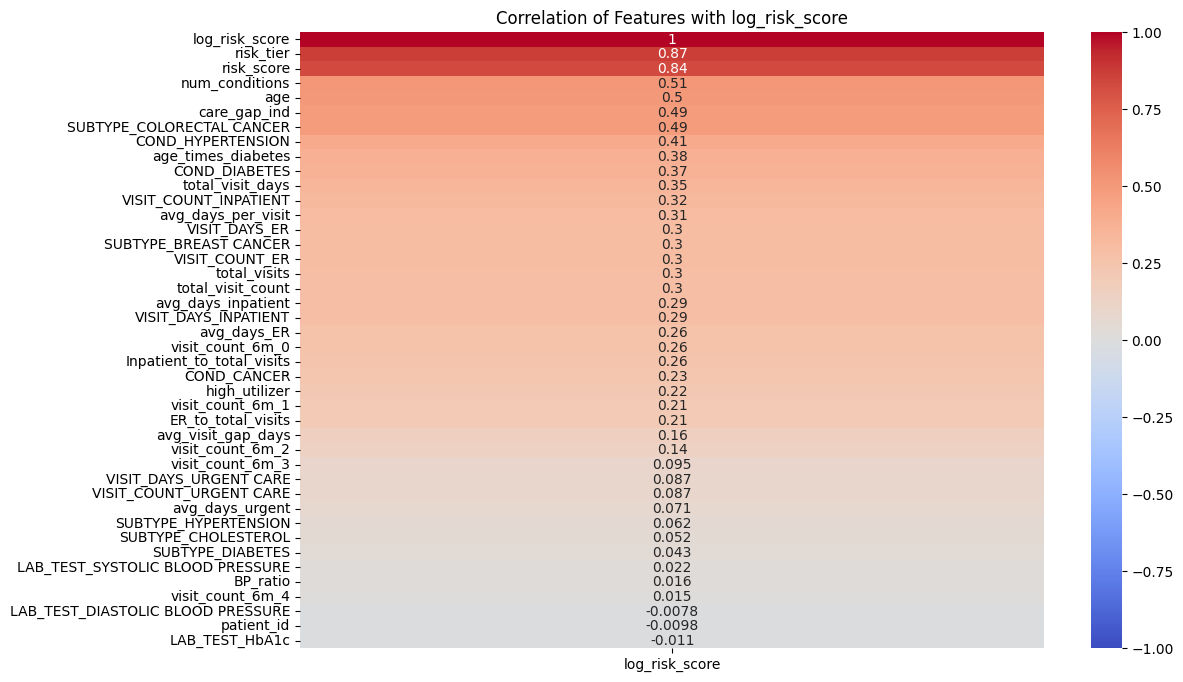

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = final_df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = final_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[['log_risk_score']].sort_values(by='log_risk_score', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with log_risk_score')
plt.show()


Top 30 features by LightGBM importance: ['age', 'avg_visit_gap_days', 'age_and_ER_visits', 'age_times_num_conditions', 'weighted_visit_days', 'high_acuity_days_ratio', 'age_times_diabetes', 'visit_trend_slope', 'visit_volatility', 'VISIT_DAYS_INPATIENT', 'avg_days_per_visit', 'high_acuity_ratio', 'Inpatient_to_total_visits', 'COND_CANCER', 'avg_days_inpatient', 'SUBTYPE_COLORECTAL CANCER', 'long_ER_ratio', 'num_conditions', 'visit_type_diversity', 'ER_to_total_visits', 'care_gap_ind', 'COND_HYPERTENSION', 'VISIT_COUNT_URGENT CARE', 'zero_visit_periods_count', 'urgent_care_ratio', 'VISIT_COUNT_INPATIENT', 'LAB_TEST_HbA1c', 'SUBTYPE_BREAST CANCER', 'VISIT_DAYS_ER', 'HbA1c_times_diabetes']


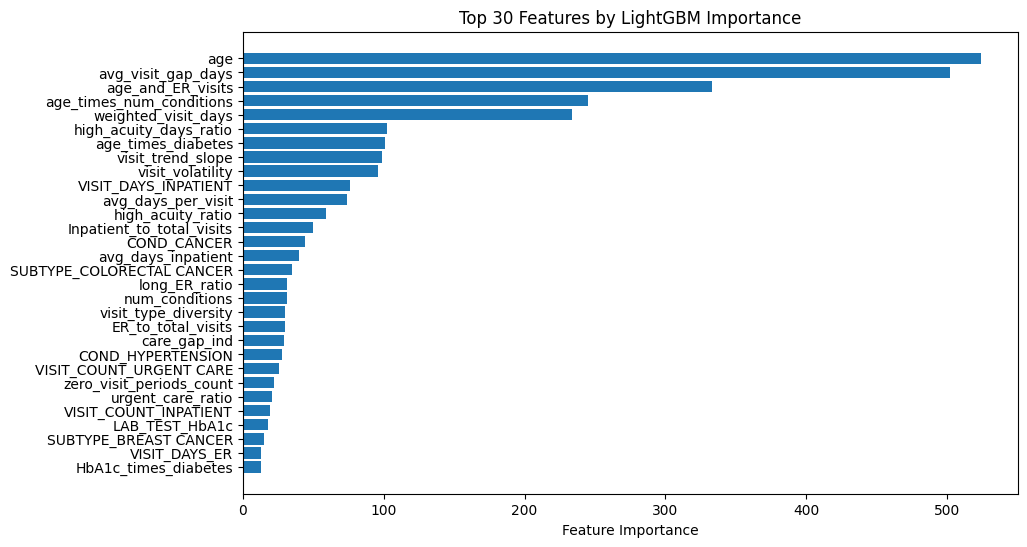

In [506]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select numeric features (excluding target)
X = final_df_cleaned.select_dtypes(include=['int64','float64']).drop(columns=['log_risk_score','patient_id'])
y = final_df_cleaned['log_risk_score']

# Split into train/test (optional, for importance calculation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)

# Train a simple LightGBM regressor
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

model = lgb.train(params, lgb_train, num_boost_round=100)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importance()
}).sort_values(by='importance', ascending=False)

# Select top k features
k = 30
top_features_lgb = feature_importance.head(k)['feature'].tolist()
print("Top", k, "features by LightGBM importance:", top_features_lgb)

# Optional: Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_importance.head(k)['feature'], feature_importance.head(k)['importance'])
plt.xlabel('Feature Importance')
plt.title(f'Top {k} Features by LightGBM Importance')
plt.gca().invert_yaxis()
plt.show()


In [507]:
X

,LAB_TEST_HbA1c,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,COND_CANCER,COND_DIABETES,COND_HYPERTENSION,...,age_and_ER_visits,MAP,BP_category,HbA1c_category,visit_trend_slope,visit_volatility,zero_visit_periods_count,high_acuity_ratio,high_acuity_days_ratio,urgent_care_ratio
0,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
1,5.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
2,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
3,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
4,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.0,40.0,2,2,-0.4,0.894427,4,1.0,1.0,0.000000
7996,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,-0.2,0.447214,4,0.0,0.0,0.999999
7997,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
7998,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,-0.2,0.447214,4,0.0,0.0,0.999999


LightGBM -> RMSE: 0.3525, R2: 0.5331
XGBoost -> RMSE: 0.3493, R2: 0.5416
CatBoost -> RMSE: 0.3385, R2: 0.5695
RandomForest -> RMSE: 0.3602, R2: 0.5125

Model Comparison:
          Model      RMSE        R2
2      CatBoost  0.338517  0.569519
1       XGBoost  0.349332  0.541572
0      LightGBM  0.352545  0.533102
3  RandomForest  0.360247  0.512477


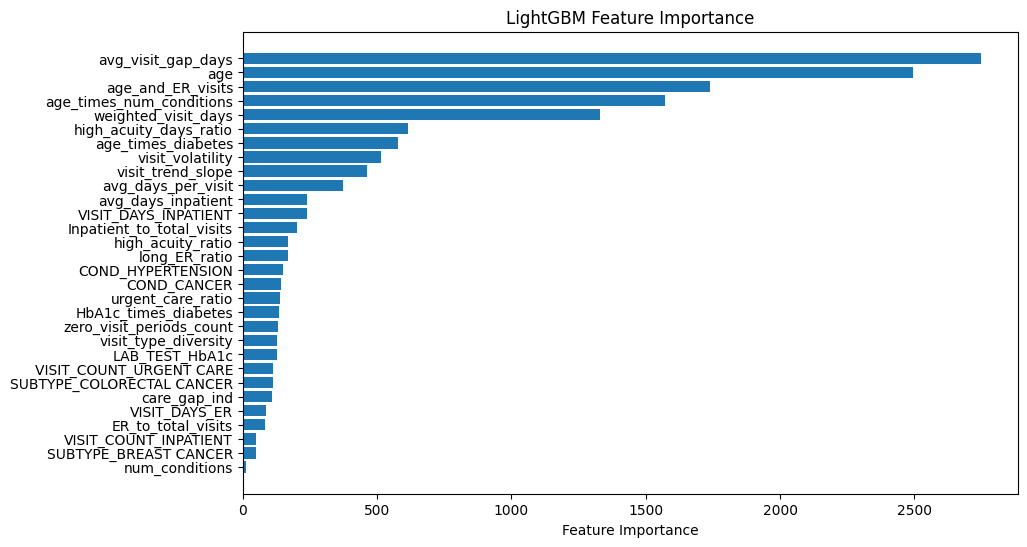

In [508]:
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Tree-based models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 1. Prepare data
# -------------------------
X = final_df_cleaned[top_features_lgb]
y = final_df_cleaned['log_risk_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 2. Define models
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42)
}

# -------------------------
# 3. Train, predict and evaluate
# -------------------------
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

    print(f"{name} -> RMSE: {rmse:.4f}, R2: {r2:.4f}")

# -------------------------
# 4. Compare results
# -------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')
print("\nModel Comparison:")
print(results_df)

# -------------------------
# 5. Optional: Feature importance for LightGBM
# -------------------------
lgb_model = models['LightGBM']
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance['feature'], importance['importance'])
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [509]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# -------------------------
# 1. Prepare data
# -------------------------
X = final_df_cleaned[top_features_lgb]
y = final_df_cleaned['log_risk_score']  # target is log_risk_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 2. Define models
# -------------------------
models = {
    'LightGBM': lgb.LGBMRegressor(objective='regression', n_estimators=500, learning_rate=0.05, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, learning_rate=0.05, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.05, verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=500, random_state=42)
}

# -------------------------
# 3. Train, predict and evaluate on original scale
# -------------------------
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)

    # Predict on log scale
    y_pred_log = model.predict(X_test)

    # Convert predictions back to original risk score scale
    y_pred_orig = np.exp(y_pred_log)
    y_test_orig = np.exp(y_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
    r2 = r2_score(y_test_orig, y_pred_orig)

    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

    print(f"{name} -> Original Scale RMSE: {rmse:.4f}, R2: {r2:.4f}")

# -------------------------
# 4. Compare all models
# -------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')
print("\nModel Comparison on Original Risk Score Scale:")
print(results_df)


LightGBM -> Original Scale RMSE: 1.6195, R2: 0.4302
XGBoost -> Original Scale RMSE: 1.5206, R2: 0.4976
CatBoost -> Original Scale RMSE: 1.4807, R2: 0.5237
RandomForest -> Original Scale RMSE: 1.6448, R2: 0.4122

Model Comparison on Original Risk Score Scale:
          Model      RMSE        R2
2      CatBoost  1.480659  0.523671
1       XGBoost  1.520612  0.497618
0      LightGBM  1.619454  0.430184
3  RandomForest  1.644769  0.412231


In [412]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,Inpatient_to_total_visits,avg_days_ER,avg_days_inpatient,avg_days_urgent,BP_ratio,num_conditions,age_group,age_times_diabetes,high_utilizer,risk_tier
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,3,0.0,0,1
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,1.0,3,0.0,0,2
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,4,0.0,0,1
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,1.0,3,0.0,0,3
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,120.0,0.0,2,0.0,1,3
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,120.0,0.0,2,0.0,1,0
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,120.0,0.0,1,0.0,0,0
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,120.0,0.0,3,0.0,1,1


In [418]:
import numpy as np
import pandas as pd

# -------------------------
# 1. Average gap between visits per patient (if visit_start_dt available)
# -------------------------
if 'visit_start_dt' in final_df.columns:
    final_df['visit_start_dt'] = pd.to_datetime(final_df['visit_start_dt'])
    final_df = final_df.sort_values(['patient_id', 'visit_start_dt'])
    final_df['prev_visit'] = final_df.groupby('patient_id')['visit_start_dt'].shift(1)
    final_df['day_gap'] = (final_df['visit_start_dt'] - final_df['prev_visit']).dt.days
    avg_gap = final_df.groupby('patient_id')['day_gap'].mean().reset_index()
    avg_gap.rename(columns={'day_gap':'avg_day_gap'}, inplace=True)
    final_df = final_df.merge(avg_gap, on='patient_id', how='left')

# -------------------------
# 2. Age × number of conditions
# -------------------------
final_df['age_times_num_conditions'] = final_df['age'] * final_df['num_conditions']

# -------------------------
# 3. HbA1c × diabetes
# -------------------------
final_df['HbA1c_times_diabetes'] = final_df['LAB_TEST_HbA1c'] * final_df['COND_DIABETES']

# -------------------------
# 4. Systolic – diastolic BP difference
# -------------------------
final_df['BP_diff'] = final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] - final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE']

# -------------------------
# 5. Binary lab flags
# -------------------------
final_df['high_HbA1c'] = (final_df['LAB_TEST_HbA1c'] > 5.7).astype(int)
final_df['high_BP'] = ((final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] > 130) |
                       (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] > 80)).astype(int)

# -------------------------
# 6. Proportion of long visits (ER days > 1)
# -------------------------
final_df['long_ER_ratio'] = (final_df['VISIT_DAYS_ER'] > 1).astype(int) / final_df['total_visits'].replace(0,1)

# -------------------------
# 7. Weighted visit days
# -------------------------
final_df['weighted_visit_days'] = (final_df['VISIT_DAYS_ER']*1 +
                                   final_df['VISIT_DAYS_INPATIENT']*2 +
                                   final_df['VISIT_DAYS_URGENT CARE']*1.5)

# -------------------------
# 8. Visit type diversity
# -------------------------
final_df['visit_type_diversity'] = ((final_df['VISIT_COUNT_ER']>0).astype(int) +
                                   (final_df['VISIT_COUNT_INPATIENT']>0).astype(int) +
                                   (final_df['VISIT_COUNT_URGENT CARE']>0).astype(int))



# -------------------------
# 11. Care gap × number of conditions
# -------------------------
final_df['caregap_times_conditions'] = final_df['care_gap_ind'] * final_df['num_conditions']

# -------------------------
# 12. Lab bins (categorical)
# -------------------------
final_df['HbA1c_bin'] = pd.cut(final_df['LAB_TEST_HbA1c'], bins=[0,5.7,6.5,10], labels=[0,1,2])
final_df['BP_bin'] = pd.cut(final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'], bins=[0,120,140,200], labels=[0,1,2])


In [414]:
final_df.drop(columns=['risk_diff_from_median', 'risk_per_visit' ], inplace=True)

KeyError: "['risk_diff_from_median', 'risk_per_visit'] not found in axis"

In [421]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,HbA1c_times_diabetes,BP_diff,high_HbA1c,high_BP,long_ER_ratio,weighted_visit_days,visit_type_diversity,caregap_times_conditions,HbA1c_bin,BP_bin
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,0.0,0,0.0,0,0
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,0.0,0,0.0,0,0
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,0.0,0,0.0,0,0
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,0.0,0,0.0,0,0
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.5,2.0,1,0.0,0,0
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,1.5,1,0.0,0,0
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,0.0,0,0.0,0,0
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0,0,0.0,1.5,1,0.0,0,0


In [422]:
final_df.columns

Index(['patient_id', 'LAB_TEST_HbA1c', 'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
       'LAB_TEST_DIASTOLIC BLOOD PRESSURE', 'SUBTYPE_BREAST CANCER',
       'SUBTYPE_CHOLESTEROL', 'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES',
       'SUBTYPE_HYPERTENSION', 'care_gap_ind', 'COND_CANCER', 'COND_DIABETES',
       'COND_HYPERTENSION', 'age', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT',
       'VISIT_COUNT_URGENT CARE', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT',
       'VISIT_DAYS_URGENT CARE', 'risk_score', 'log_risk_score',
       'visit_count_6m_0', 'visit_count_6m_1', 'visit_count_6m_2',
       'visit_count_6m_3', 'visit_count_6m_4', 'total_visit_count',
       'avg_visit_gap_days', 'total_visits', 'total_visit_days',
       'avg_days_per_visit', 'ER_to_total_visits', 'Inpatient_to_total_visits',
       'avg_days_ER', 'avg_days_inpatient', 'avg_days_urgent', 'BP_ratio',
       'num_conditions', 'age_group', 'age_times_diabetes', 'high_utilizer',
       'risk_tier', 'age_times_num_conditions', 

In [428]:
final_df['VISIT_COUNT_ER']

,VISIT_COUNT_ER
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
7995,2.0
7996,0.0
7997,0.0
7998,0.0


In [427]:
visit_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,visit_days,first_visit_dt_x,period_6m,first_visit_dt_y,first_visit_dt,prev_visit,gap_days,prev_visit_start,day_gap
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,NaT,NaN,NaT,NaN
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,2023-12-23,57.0,2023-12-23,57.0
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f,1,2023-12-23,0,2023-12-23,2023-12-23,2024-02-18,4.0,2024-02-18,4.0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,2024-02-22,17.0,2024-02-22,17.0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,1,2023-12-23,2023-12-23,2024-03-10,147.0,2024-03-10,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,15392,ER,82060,2024-05-13,2024-05-13,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2024-05-03,0,2024-05-03,2024-05-03,2024-05-09,4.0,2024-05-09,4.0
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f,1,2024-06-12,0,2024-06-12,2024-06-12,NaT,NaN,NaT,NaN
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f,1,2024-06-12,0,2024-06-12,2024-06-12,2024-06-12,78.0,2024-06-12,78.0
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2024-12-28,0,2024-12-28,2024-12-28,NaT,NaN,NaT,NaN


In [431]:
import numpy as np
import pandas as pd

# Assuming 'final_df' is your DataFrame

# -----------------------------------------------------------------
# 1. Warning: Check for Target Leakage
# -----------------------------------------------------------------
# If 'risk_tier' was created FROM 'risk_score' or 'log_risk_score',
# it MUST be removed before training.
# Uncomment the line below if this is the case.
#
# if 'risk_tier' in final_df.columns:
#     final_df = final_df.drop(columns=['risk_tier'])
#     print("Dropped 'risk_tier' to prevent target leakage.")


# -----------------------------------------------------------------
# 2. Comorbidity and Interaction Features
# -----------------------------------------------------------------
print("Creating Comorbidity and Interaction features...")

# Specific Comorbidities
final_df['diabetes_and_hypertension'] = final_df['COND_DIABETES'] * final_df['COND_HYPERTENSION']
final_df['diabetes_and_cancer'] = final_df['COND_DIABETES'] * final_df['COND_CANCER']
final_df['cancer_and_hypertension'] = final_df['COND_CANCER'] * final_df['COND_HYPERTENSION']
final_df['triple_threat'] = final_df['COND_DIABETES'] * final_df['COND_HYPERTENSION'] * final_df['COND_CANCER']

# Condition + Lab Value Interactions
final_df['hypertension_and_high_BP'] = final_df['COND_HYPERTENSION'] * final_df['high_BP']
final_df['hypertension_and_BP_diff'] = final_df['COND_HYPERTENSION'] * final_df['BP_diff']

# Care Gap Interactions
final_df['caregap_and_high_HbA1c'] = final_df['care_gap_ind'] * final_df['high_HbA1c']
final_df['caregap_and_high_utilizer'] = final_df['care_gap_ind'] * final_df['high_utilizer']
final_df['caregap_and_diabetes'] = final_df['care_gap_ind'] * final_df['COND_DIABETES']

# Age + Utilization Interaction
final_df['age_and_ER_visits'] = final_df['age'] * final_df['VISIT_COUNT_ER']


# -----------------------------------------------------------------
# 3. Clinical & Lab-Based Features
# -----------------------------------------------------------------
print("Creating Clinical & Lab-Based features...")

# Mean Arterial Pressure (MAP)
final_df['MAP'] = (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] + 2 * final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE']) / 3


# [Image of Mean Arterial Pressure calculation formula]


# BP Categories (Categorical Feature)
# Using np.select for efficient binning
bp_conditions = [
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] < 120) & (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] < 80),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'].between(120, 129)) & (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] < 80),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'].between(130, 139)) | (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'].between(80, 89)),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] >= 140) | (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] >= 90),
    (final_df['LAB_TEST_SYSTOLIC BLOOD PRESSURE'] > 180) | (final_df['LAB_TEST_DIASTOLIC BLOOD PRESSURE'] > 120)
]
bp_choices = [
    1, # Normal
    2, # Elevated
    3, # Stage 1 HTN
    4, # Stage 2 HTN
    5  # Hypertensive Crisis
]
# default=0 to catch any NaNs or edge cases
final_df['BP_category'] = np.select(bp_conditions, bp_choices, default=0)


# [Image of Blood Pressure Categories Chart]


# HbA1c Categories (Categorical Feature)
hba1c_conditions = [
    (final_df['LAB_TEST_HbA1c'] < 5.7),
    (final_df['LAB_TEST_HbA1c'].between(5.7, 6.4)),
    (final_df['LAB_TEST_HbA1c'].between(6.5, 8.0)),
    (final_df['LAB_TEST_HbA1c'] > 8.0)
]
hba1c_choices = [
    1, # Normal
    2, # Prediabetes
    3, # Controlled Diabetes
    4  # Uncontrolled Diabetes
]
# default=0 to catch any NaNs
final_df['HbA1c_category'] = np.select(hba1c_conditions, hba1c_choices, default=0)


# -----------------------------------------------------------------
# 4. Trend & Recency Features (from visit_count_6m_...)
# -----------------------------------------------------------------
print("Creating Trend & Recency features...")

# List of the 6-month visit columns in order (oldest to newest)
# Adjust this list if your column names or order are different
visit_cols = [
    'visit_count_6m_0', 'visit_count_6m_1', 'visit_count_6m_2',
    'visit_count_6m_3', 'visit_count_6m_4'
]

# Ensure these columns exist before proceeding
if all(col in final_df.columns for col in visit_cols):
    # Visit Trend (Slope)
    # We use np.polyfit to find the slope of the line of best fit
    periods = np.arange(len(visit_cols))

    # Define a function to apply to each row
    def get_slope(row):
        # We need at least 2 non-NaN points to fit a line
        if row.notna().sum() < 2:
            return np.nan
        # Fit a 1-degree polynomial (a line) and return the slope (the first coefficient)
        # We use .dropna() to handle any missing periods
        valid_indices = row.notna()
        return np.polyfit(periods[valid_indices], row[valid_indices], 1)[0]

    # Use .apply() along axis=1 (rows)
    final_df['visit_trend_slope'] = final_df[visit_cols].apply(get_slope, axis=1)

    # Recent vs. Past Utilization (assuming _3 and _4 are most recent)
    final_df['recent_visits'] = final_df['visit_count_6m_3'] + final_df['visit_count_6m_4']
    final_df['past_visits'] = final_df['visit_count_6m_0'] + final_df['visit_count_6m_1']
    final_df['recent_vs_past_diff'] = final_df['recent_visits'] - final_df['past_visits']

    # Visit Volatility (Standard Deviation of visits)
    final_df['visit_volatility'] = final_df[visit_cols].std(axis=1)

    # Zero-Visit Periods
    final_df['zero_visit_periods_count'] = (final_df[visit_cols] == 0).sum(axis=1)
else:
    print("Warning: Not all 'visit_count_6m_...' columns were found. Skipping Trend features.")


# -----------------------------------------------------------------
# 5. Advanced Utilization Ratios
# -----------------------------------------------------------------
print("Creating Advanced Utilization Ratios...")

# Add a small epsilon to denominators to prevent division by zero
epsilon = 1e-6

# High-Acuity Visit Ratio
final_df['high_acuity_visits'] = final_df['VISIT_COUNT_ER'] + final_df['VISIT_COUNT_INPATIENT']
final_df['high_acuity_ratio'] = final_df['high_acuity_visits'] / (final_df['total_visit_count'] + epsilon)

# High-Acuity Days Ratio
final_df['high_acuity_days'] = final_df['VISIT_DAYS_ER'] + final_df['VISIT_DAYS_INPATIENT']
final_df['high_acuity_days_ratio'] = final_df['high_acuity_days'] / (final_df['total_visit_days'] + epsilon)

# Urgent Care Ratio
final_df['urgent_care_ratio'] = final_df['VISIT_COUNT_URGENT CARE'] / (final_df['total_visit_count'] + epsilon)


print("\nFeature creation complete.")
print(f"New features added: {list(final_df.columns[-18:])}") # Show the last 18 new columns

Creating Comorbidity and Interaction features...
Creating Clinical & Lab-Based features...
Creating Trend & Recency features...
Creating Advanced Utilization Ratios...

Feature creation complete.
New features added: ['caregap_and_high_HbA1c', 'caregap_and_high_utilizer', 'caregap_and_diabetes', 'age_and_ER_visits', 'MAP', 'BP_category', 'HbA1c_category', 'visit_trend_slope', 'recent_visits', 'past_visits', 'recent_vs_past_diff', 'visit_volatility', 'zero_visit_periods_count', 'high_acuity_visits', 'high_acuity_ratio', 'high_acuity_days', 'high_acuity_days_ratio', 'urgent_care_ratio']


In [432]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,recent_visits,past_visits,recent_vs_past_diff,visit_volatility,zero_visit_periods_count,high_acuity_visits,high_acuity_ratio,high_acuity_days,high_acuity_days_ratio,urgent_care_ratio
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,-2.0,0.894427,4,2.0,1.0,2.0,1.0,0.000000
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.447214,4,0.0,0.0,0.0,0.0,0.999999
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.447214,4,0.0,0.0,0.0,0.0,0.999999


In [435]:
final_df

,patient_id,LAB_TEST_HbA1c,LAB_TEST_SYSTOLIC BLOOD PRESSURE,LAB_TEST_DIASTOLIC BLOOD PRESSURE,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,...,recent_visits,past_visits,recent_vs_past_diff,visit_volatility,zero_visit_periods_count,high_acuity_visits,high_acuity_ratio,high_acuity_days,high_acuity_days_ratio,urgent_care_ratio
0,1,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
1,19,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
2,40,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
3,46,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
4,58,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,-2.0,0.894427,4,2.0,1.0,2.0,1.0,0.000000
7996,82117,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.447214,4,0.0,0.0,0.0,0.0,0.999999
7997,82120,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,5,0.0,0.0,0.0,0.0,0.000000
7998,82130,5.7,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.447214,4,0.0,0.0,0.0,0.0,0.999999


/tmp/ipython-input-3608910400.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col]) or X[col].nunique() < 20:
/tmp/ipython-input-3608910400.py:34: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[col]):


Identified 35 discrete features.
Calculating Mutual Information scores...

--- Mutual Information Scores (Feature vs. Target) ---
age                          0.349457
age_times_num_conditions     0.189372
num_conditions               0.168432
COND_HYPERTENSION            0.107533
hypertension_and_BP_diff     0.106868
SUBTYPE_COLORECTAL CANCER    0.106183
care_gap_ind                 0.101581
caregap_times_conditions     0.080904
HbA1c_times_diabetes         0.080849
COND_DIABETES                0.075612
age_times_diabetes           0.074974
age_and_ER_visits            0.074499
caregap_and_high_utilizer    0.066286
diabetes_and_hypertension    0.061023
weighted_visit_days          0.057020
high_acuity_ratio            0.054043
avg_days_per_visit           0.045610
caregap_and_diabetes         0.044370
ER_to_total_visits           0.043553
high_acuity_days_ratio       0.041016
visit_type_diversity         0.038700
VISIT_COUNT_ER               0.038370
VISIT_DAYS_ER                0.037

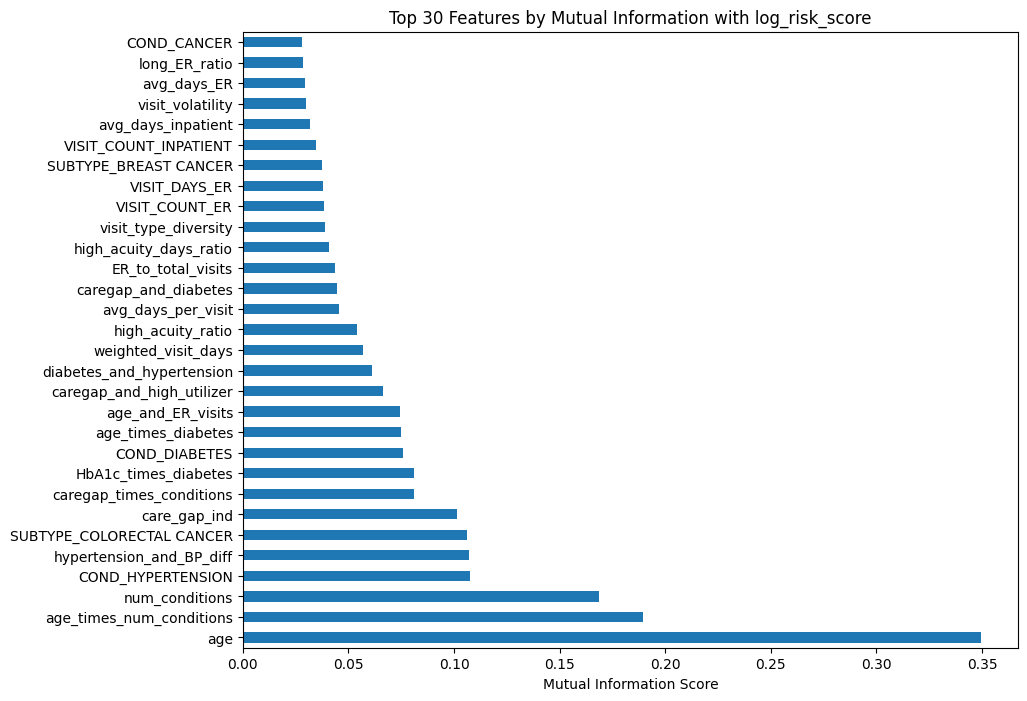

In [458]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Prepare Data ---
# 1. Define your features (X) and target (y)
features_to_exclude = ['patient_id', 'risk_score', 'log_risk_score']
valid_features_to_exclude = [col for col in features_to_exclude if col in final_df_cleaned.columns]
X = final_df_cleaned.drop(columns=valid_features_to_exclude)
y = final_df_cleaned['log_risk_score']

# 2. Identify which features are discrete (for the MI algorithm)
# We'll do this *before* encoding them all to numbers
discrete_features = []
for col in X.columns:
    # Treat object types and low-cardinality numbers as discrete
    if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col]) or X[col].nunique() < 20:
        discrete_features.append(True)
    else:
        discrete_features.append(False)

print(f"Identified {sum(discrete_features)} discrete features.")

# 3. Robustly handle NaNs and Encode all columns to be numeric
for col in X.columns:
    if pd.api.types.is_numeric_dtype(X[col]) and not discrete_features[X.columns.get_loc(col)]:
        # A) For continuous numeric columns: Fill with median (more robust to outliers than 0)
        X[col] = X[col].fillna(X[col].median())
    else:
        # B) For discrete, categorical, or object columns:

        # If it's already a category dtype, add 'Missing' as a valid category
        if pd.api.types.is_categorical_dtype(X[col]):
            if 'Missing' not in X[col].cat.categories:
                X[col] = X[col].cat.add_categories(['Missing'])

        # Fill NaNs (for object or category) with the 'Missing' string
        X[col] = X[col].fillna('Missing')

        # Now, convert the entire column to category codes (numbers)
        X[col] = pd.Categorical(X[col]).codes

# At this point, all columns in X are numeric (int or float) and have no NaNs.

# --- Calculate MI ---
print("Calculating Mutual Information scores...")
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=42)

# --- View Results ---
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

print("\n--- Mutual Information Scores (Feature vs. Target) ---")
print(mi_series)

# Plot the top 30
plt.figure(figsize=(10, 8))
mi_series.head(30).plot(kind='barh')
plt.title('Top 30 Features by Mutual Information with log_risk_score')
plt.xlabel('Mutual Information Score')
plt.show()

In [450]:
final_df.columns

Index(['patient_id', 'LAB_TEST_HbA1c', 'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
       'LAB_TEST_DIASTOLIC BLOOD PRESSURE', 'SUBTYPE_BREAST CANCER',
       'SUBTYPE_CHOLESTEROL', 'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES',
       'SUBTYPE_HYPERTENSION', 'care_gap_ind', 'COND_CANCER', 'COND_DIABETES',
       'COND_HYPERTENSION', 'age', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT',
       'VISIT_COUNT_URGENT CARE', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT',
       'VISIT_DAYS_URGENT CARE', 'risk_score', 'log_risk_score',
       'visit_count_6m_0', 'visit_count_6m_1', 'visit_count_6m_2',
       'visit_count_6m_3', 'visit_count_6m_4', 'total_visit_count',
       'avg_visit_gap_days', 'total_visits', 'total_visit_days',
       'avg_days_per_visit', 'ER_to_total_visits', 'Inpatient_to_total_visits',
       'avg_days_ER', 'avg_days_inpatient', 'avg_days_urgent', 'BP_ratio',
       'num_conditions', 'age_group', 'age_times_diabetes', 'high_utilizer',
       'risk_tier', 'age_times_num_conditions', 

In [490]:
# List of all columns to remove
features_to_remove = [
    # 1. Target Leakage & Identifiers
    'risk_score',
    'risk_tier',

    # 2. Redundant Aggregates
    'total_visits',
    'total_visit_count',
    'total_visit_days',
    'high_acuity_visits',
    'high_acuity_days',

    # 3. Redundant Time-Series
    'visit_count_6m_0',
    'visit_count_6m_1',
    'visit_count_6m_2',
    'visit_count_6m_3',
    'visit_count_6m_4',
    'recent_visits',
    'past_visits',
    'recent_vs_past_diff',

    # 4. Redundant Binned/Categorical
    'age_group',
    'HbA1c_bin',
    'high_HbA1c',
    'BP_bin',
    'high_BP',

    # 5. Redundant Engineered Labs
    'LAB_TEST_SYSTOLIC BLOOD PRESSURE',
    'LAB_TEST_DIASTOLIC BLOOD PRESSURE',
    'BP_ratio'
]

# Create the cleaned DataFrame
# errors='ignore' will prevent an error if a column was already removed
final_df_cleaned = final_df.drop(columns=features_to_remove, errors='ignore')

# This is your final list of features for training (X)
# You still need to separate your target variable (y)
X_features_list = [col for col in final_df_cleaned.columns if col not in ['log_risk_score']]

print(f"Original number of columns: {len(final_df.columns)}")
print(f"Number of columns removed: {len(features_to_remove)}")
print(f"Remaining columns (features + target): {len(final_df_cleaned.columns)}")
print("\nFinal list of features to use for X:")
print(X_features_list)

# Now you can proceed with your train-test split
# X = final_df_cleaned[X_features_list]
# y = final_df_cleaned['log_risk_score']

Original number of columns: 78
Number of columns removed: 23
Remaining columns (features + target): 55

Final list of features to use for X:
['patient_id', 'LAB_TEST_HbA1c', 'SUBTYPE_BREAST CANCER', 'SUBTYPE_CHOLESTEROL', 'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES', 'SUBTYPE_HYPERTENSION', 'care_gap_ind', 'COND_CANCER', 'COND_DIABETES', 'COND_HYPERTENSION', 'age', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT', 'VISIT_COUNT_URGENT CARE', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT', 'VISIT_DAYS_URGENT CARE', 'avg_visit_gap_days', 'avg_days_per_visit', 'ER_to_total_visits', 'Inpatient_to_total_visits', 'avg_days_ER', 'avg_days_inpatient', 'avg_days_urgent', 'num_conditions', 'age_times_diabetes', 'high_utilizer', 'age_times_num_conditions', 'HbA1c_times_diabetes', 'BP_diff', 'long_ER_ratio', 'weighted_visit_days', 'visit_type_diversity', 'caregap_times_conditions', 'diabetes_and_hypertension', 'diabetes_and_cancer', 'cancer_and_hypertension', 'triple_threat', 'hypertension_and_high_BP', 'hype

In [491]:
final_df_cleaned

,patient_id,LAB_TEST_HbA1c,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,COND_CANCER,COND_DIABETES,...,age_and_ER_visits,MAP,BP_category,HbA1c_category,visit_trend_slope,visit_volatility,zero_visit_periods_count,high_acuity_ratio,high_acuity_days_ratio,urgent_care_ratio
0,1,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
1,19,5.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
2,40,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
3,46,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
4,58,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.0,40.0,2,2,-0.4,0.894427,4,1.0,1.0,0.000000
7996,82117,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,-0.2,0.447214,4,0.0,0.0,0.999999
7997,82120,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,0.0,0.000000,5,0.0,0.0,0.000000
7998,82130,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,2,2,-0.2,0.447214,4,0.0,0.0,0.999999


In [456]:
final_df_cleaned.drop('risk_tier',axis=1)

KeyError: "['risk_tier'] not found in axis"

In [457]:
final_df_cleaned.columns

Index(['LAB_TEST_HbA1c', 'SUBTYPE_BREAST CANCER', 'SUBTYPE_CHOLESTEROL',
       'SUBTYPE_COLORECTAL CANCER', 'SUBTYPE_DIABETES', 'SUBTYPE_HYPERTENSION',
       'care_gap_ind', 'COND_CANCER', 'COND_DIABETES', 'COND_HYPERTENSION',
       'age', 'VISIT_COUNT_ER', 'VISIT_COUNT_INPATIENT',
       'VISIT_COUNT_URGENT CARE', 'VISIT_DAYS_ER', 'VISIT_DAYS_INPATIENT',
       'VISIT_DAYS_URGENT CARE', 'log_risk_score', 'avg_visit_gap_days',
       'avg_days_per_visit', 'ER_to_total_visits', 'Inpatient_to_total_visits',
       'avg_days_ER', 'avg_days_inpatient', 'avg_days_urgent',
       'num_conditions', 'age_times_diabetes', 'high_utilizer',
       'age_times_num_conditions', 'HbA1c_times_diabetes', 'BP_diff',
       'long_ER_ratio', 'weighted_visit_days', 'visit_type_diversity',
       'caregap_times_conditions', 'diabetes_and_hypertension',
       'diabetes_and_cancer', 'cancer_and_hypertension', 'triple_threat',
       'hypertension_and_high_BP', 'hypertension_and_BP_diff',
       'caregap_a

In [471]:
visit_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,visit_days,first_visit_dt_x,period_6m,first_visit_dt_y,first_visit_dt,prev_visit,gap_days,prev_visit_start,day_gap
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,NaT,NaN,NaT,NaN
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,2023-12-23,57.0,2023-12-23,57.0
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f,1,2023-12-23,0,2023-12-23,2023-12-23,2024-02-18,4.0,2024-02-18,4.0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,2024-02-22,17.0,2024-02-22,17.0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,1,2023-12-23,2023-12-23,2024-03-10,147.0,2024-03-10,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,15392,ER,82060,2024-05-13,2024-05-13,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2024-05-03,0,2024-05-03,2024-05-03,2024-05-09,4.0,2024-05-09,4.0
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f,1,2024-06-12,0,2024-06-12,2024-06-12,NaT,NaN,NaT,NaN
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f,1,2024-06-12,0,2024-06-12,2024-06-12,2024-06-12,78.0,2024-06-12,78.0
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2024-12-28,0,2024-12-28,2024-12-28,NaT,NaN,NaT,NaN


In [473]:
visit_df['prncpl_diag_nm'].unique()

array(['Acute upper respiratory infection, unspecified',
       'Acute pharyngitis, unspecified', 'Periorbital cellulitis', ...,
       'Acute nephritic syndrome with unspecified morphologic changes',
       'Sprain of interphalangeal joint of left middle finger, initial encounter',
       'Antepartum hemorrhage, unspecified, second trimester'],
      dtype=object)

In [474]:
# for val in visit_df['prncpl_diag_nm'].dropna().unique():
#     print(val)


Acute upper respiratory infection, unspecified
Acute pharyngitis, unspecified
Periorbital cellulitis
Fever, unspecified
Strain of muscle, fascia and tendon at neck level, initial encounter
Dizziness and giddiness
Viral infection, unspecified
Cough, unspecified
Pneumonia, unspecified organism
Bronchitis, not specified as acute or chronic
Headache, unspecified
Foreign body sensation, other site
Foreign body in right ear, initial encounter
Impacted cerumen, unspecified ear
Unspecified injury of left wrist, hand and finger(s), initial encounter
Influenza due to other identified influenza virus with other respiratory manifestations
Other chest pain
Epigastric pain
Calculus of gallbladder without cholecystitis without obstruction
Otalgia, bilateral
Other specified pregnancy related conditions, second trimester
Endocrine, nutritional and metabolic diseases complicating childbirth
Gestational diabetes mellitus in childbirth, diet controlled
Spinal stenosis, lumbar region without neurogenic cla

In [475]:
# import pandas as pd
# import numpy as np

# def map_diagnosis_to_group(diag_name, keyword_map):
#     """
#     Maps a raw diagnosis string to a clinical group based on keywords.
#     The order of the keyword_map dictionary is critical.
#     """
#     if not isinstance(diag_name, str):
#         return 'DIAG_OTHER'

#     diag_name_lower = diag_name.lower()

#     for group, keywords in keyword_map.items():
#         for keyword in keywords:
#             if keyword in diag_name_lower:
#                 return group

#     return 'DIAG_OTHER'

In [476]:
# A comprehensive keyword map based on your list.
# Order matters! Specific conditions first.
DIAGNOSIS_KEYWORD_MAP = {
    # --- High Acuity / Severe ---
    'DIAG_SEVERE_CARDIO': ['myocardial infarction', 'stemi', 'nstemi', 'cardiac arrest', 'aortic aneurysm', 'takotsubo'],
    'DIAG_SEVERE_NEURO': ['cerebral infarction', 'stroke', 'subdural hemorrhage', 'intracerebral hemorrhage', 'aneurysm, nonruptured'],
    'DIAG_SEVERE_INFECTION': ['sepsis', 'septic shock'],
    'DIAG_SEVERE_RESPIRATORY': ['respiratory failure', 'pneumothorax', 'hemothorax', 'pulmonary embolism'],
    'DIAG_SEVERE_GI': ['acute abdomen', 'intestinal obstruction', 'volvulus', 'perforation'],
    'DIAG_KIDNEY_FAILURE': ['acute kidney failure', 'end stage renal disease', 'renal failure'],

    # --- Pregnancy / OBGYN ---
    'DIAG_PREGNANCY_OBGYN': [
        'pregnancy', 'childbirth', 'puerperium', 'gestational', 'antepartum', 'postpartum',
        'maternal care', 'perineal laceration', 'fetal', 'abortion', 'pre-eclampsia', 'eclampsia'
    ],

    # --- Chronic Conditions ---
    'DIAG_CARDIOVASCULAR': [
        'hypertension', 'hypertensive', 'atrial fibrillation', 'angina', 'tachycardia',
        'atherosclerotic', 'heart disease', 'heart failure', 'arrhythmia', 'cardiomyopathy'
    ],
    'DIAG_DIABETES_METABOLIC': ['diabetes mellitus', 'hyperglycemia', 'hypoglycemia', 'ketoacidosis', 'hyperosmolarity'],
    'DIAG_CHRONIC_RESPIRATORY': ['asthma', 'chronic obstructive pulmonary', 'copd', 'emphysema', 'chronic bronchitis'],
    'DIAG_CHRONIC_GI': ['crohn\'s', 'ulcerative colitis', 'gastro-esophageal reflux', 'gerd', 'diverticulosis'],

    # --- Acute / Symptomatic ---
    'DIAG_INFECTION_BACTERIAL': ['cellulitis', 'abscess', 'pneumonia', 'uti', 'urinary tract infection', 'pyelonephritis', 'cystitis', 'streptococcal', 'gonococcal'],
    'DIAG_INFECTION_VIRAL': ['influenza', 'covid-19', 'coronavirus', 'viral infection', 'herpes', 'zoster', 'mononucleosis'],
    'DIAG_INFECTION_FUNGAL_OTHER': ['candidiasis', 'tinea', 'scabies', 'mycosis'],
    'DIAG_ACUTE_RESPIRATORY': [
        'respiratory infection', 'pharyngitis', 'cough', 'bronchitis', 'sinusitis',
        'nasopharyngitis', 'rhinitis', 'laryngitis', 'tonsillitis', 'bronchiolitis'
    ],
    'DIAG_ACUTE_GI': [
        'abdominal pain', 'nausea', 'vomiting', 'diarrhea', 'gastroenteritis',
        'appendicitis', 'diverticulitis', 'gastritis', 'pancreatitis', 'cholecystitis', 'gallbladder'
    ],
    'DIAG_INJURY_TRAUMA': [
        'fracture', 'sprain', 'contusion', 'laceration', 'abrasion', 'strain', 'injury',
        'burn', 'wound', 'dislocation', 'concussion', 'traumatic'
    ],
    'DIAG_MENTAL_HEALTH_SUBSTANCE': [
        'anxiety', 'depressive', 'depression', 'bipolar', 'psychosis', 'psychotic', 'dementia',
        'alcohol', 'opioid', 'cannabis', 'cocaine', 'dependence', 'suicidal', 'adjustment disorder'
    ],
    'DIAG_NEUROLOGICAL': ['dizziness', 'headache', 'migraine', 'syncope', 'vertigo', 'seizure', 'epilepsy', 'tremor', 'bell\'s palsy'],
    'DIAG_PAIN_MUSCULOSKELETAL': [
        'pain in', 'lumbago', 'sciatica', 'low back pain', 'myalgia', 'arthralgia',
        'osteoarthritis', 'tendinitis', 'bursitis', 'cervicalgia', 'dorsalgia', 'painful', 'pain'
    ],
    'DIAG_SKIN': ['rash', 'dermatitis', 'urticaria', 'cyst', 'pruritus', 'skin eruption', 'acne', 'psoriasis', 'rosacea'],
    'DIAG_EAR_NOSE_THROAT': ['otitis', 'otalgia', 'ear', 'impacted cerumen', 'epistaxis', 'nasal congestion', 'pharyngitis', 'throat'],
    'DIAG_GENITOURINARY_GU': ['dysuria', 'hematuria', 'renal colic', 'calculus of kidney', 'ureter', 'epididymitis', 'prostatitis', 'vaginitis'],

    # --- Administrative / Low Acuity ---
    'DIAG_ADMIN_ENCOUNTER': ['encounter for', 'aftercare', 'screening', 'examination', 'counseling', 'prophylactic', 'immunization']
}

In [477]:
# visit_df

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,visit_days,first_visit_dt_x,period_6m,first_visit_dt_y,first_visit_dt,prev_visit,gap_days,prev_visit_start,day_gap
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,NaT,NaN,NaT,NaN
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,2023-12-23,57.0,2023-12-23,57.0
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f,1,2023-12-23,0,2023-12-23,2023-12-23,2024-02-18,4.0,2024-02-18,4.0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,0,2023-12-23,2023-12-23,2024-02-22,17.0,2024-02-22,17.0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f,1,2023-12-23,1,2023-12-23,2023-12-23,2024-03-10,147.0,2024-03-10,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,15392,ER,82060,2024-05-13,2024-05-13,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2024-05-03,0,2024-05-03,2024-05-03,2024-05-09,4.0,2024-05-09,4.0
6184,15395,ER,82098,2024-06-12,2024-06-12,8888-12-31,NaN,Unspecified abdominal pain,f,1,2024-06-12,0,2024-06-12,2024-06-12,NaT,NaN,NaT,NaN
6185,15396,ER,82098,2024-08-29,2024-08-29,8888-12-31,NaN,"Strain of muscle, fascia and tendon at neck le...",f,1,2024-06-12,0,2024-06-12,2024-06-12,2024-06-12,78.0,2024-06-12,78.0
6186,15397,URGENT CARE,82117,2024-12-28,2024-12-28,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f,1,2024-12-28,0,2024-12-28,2024-12-28,NaT,NaN,NaT,NaN


In [479]:
# # === This is a simulation ===
# # In your code, you would load your actual diagnosis data here
# # I'll create a small dummy 'diag_df' for this example


# # 1. Apply the mapping function to create the new 'diag_group' column
# print("Applying diagnosis mapping...")
# visit_df['diag_group'] = visit_df['prncpl_diag_nm'].apply(
#     map_diagnosis_to_group,
#     keyword_map=DIAGNOSIS_KEYWORD_MAP
# )

# # 2. Create COUNT features using pivot_table
# print("Creating count features...")
# diag_count_features = visit_df.pivot_table(
#     index='patient_id',
#     columns='diag_group',
#     aggfunc='size',
#     fill_value=0
# )

# # 3. Create general diagnosis stats
# print("Creating aggregate stats...")
# diag_stats = visit_df.groupby('patient_id').agg(
#     # Total number of diagnoses recorded
#     total_diagnosis_count=('prncpl_diag_nm', 'count'),
#     # How many different groups? (Measures complexity)
#     unique_diag_group_count=('diag_group', 'nunique')
# )

# # 4. Combine count features and stats
# diag_features_final = diag_stats.join(diag_count_features)

# # 5. Create RATIO features (These are often the BEST features)
# print("Creating ratio features...")
# # Get all the 'DIAG_' count columns we just made
# diag_group_columns = [col for col in diag_features_final.columns if col.startswith('DIAG_')]

# # Divide each count column by the total_diagnosis_count to get a ratio
# # We add + 1e-6 to avoid dividing by zero
# for col in diag_group_columns:
#     diag_features_final[f'ratio_{col}'] = (
#         diag_features_final[col] / (diag_features_final['total_diagnosis_count'] + 1e-6)
#     )

# # Optional: Drop the raw count columns to reduce redundancy
# # diag_features_final = diag_features_final.drop(columns=diag_group_columns)

# print("\n--- Example of Final Diagnosis Features ---")
# # Reset index so 'patient_id' is a column for merging
# print(diag_features_final)

Applying diagnosis mapping...
Creating count features...
Creating aggregate stats...
Creating ratio features...

--- Example of Final Diagnosis Features ---
            total_diagnosis_count  unique_diag_group_count  DIAG_ACUTE_GI  \
patient_id                                                                  
80                              5                        2              0   
98                              1                        1              0   
110                             6                        5              0   
125                             1                        1              0   
161                             1                        1              0   
...                           ...                      ...            ...   
82056                           3                        3              0   
82060                           3                        1              0   
82098                           2                        2              1

In [480]:
# diag_features_final

,total_diagnosis_count,unique_diag_group_count,DIAG_ACUTE_GI,DIAG_ACUTE_RESPIRATORY,DIAG_ADMIN_ENCOUNTER,DIAG_CARDIOVASCULAR,DIAG_CHRONIC_GI,DIAG_CHRONIC_RESPIRATORY,DIAG_DIABETES_METABOLIC,DIAG_EAR_NOSE_THROAT,...,ratio_DIAG_NEUROLOGICAL,ratio_DIAG_OTHER,ratio_DIAG_PAIN_MUSCULOSKELETAL,ratio_DIAG_PREGNANCY_OBGYN,ratio_DIAG_SEVERE_CARDIO,ratio_DIAG_SEVERE_GI,ratio_DIAG_SEVERE_INFECTION,ratio_DIAG_SEVERE_NEURO,ratio_DIAG_SEVERE_RESPIRATORY,ratio_DIAG_SKIN
patient_id,,,,,,,,,,,,,,,,,,,,,
80,5,2,0,4,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1,1,0,0,0,0,0,0,0,0,...,0.000000,0.999999,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,6,5,0,2,0,0,0,0,0,0,...,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1,1,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,1,1,0,0,0,0,0,0,0,0,...,0.999999,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82056,3,3,0,0,0,0,0,1,0,0,...,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82060,3,1,0,3,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82098,2,2,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [487]:
# # Assume 'diag_features_final' is your DataFrame.

# # --- Step 1: Ensure 'patient_id' is a column ---
# # If 'patient_id' is the index, reset it to be a column.
# if diag_features_final.index.name == 'patient_id':
#     diag_features_final = diag_features_final.reset_index()

# # --- Step 2: Define the list of columns to KEEP ---

# # Start with 'patient_id'
# cols_to_keep = ['patient_id']

# # Add other unique, non-redundant stats
# if 'unique_diag_group_count' in diag_features_final.columns:
#     cols_to_keep.append('unique_diag_group_count')

# # --- Step 3: Get all ratio columns ---
# all_ratio_cols = [col for col in diag_features_final.columns if col.startswith('ratio_DIAG_')]

# # --- Step 4: Remove one ratio column to break dependency ---
# # We remove 'ratio_DIAG_OTHER' as it's the least informative.
# if 'ratio_DIAG_OTHER' in all_ratio_cols:
#     all_ratio_cols.remove('ratio_DIAG_OTHER')
# elif all_ratio_cols:
#     # Fallback: if 'ratio_DIAG_OTHER' isn't present, remove the last one
#     all_ratio_cols.pop()

# # --- Step 5: Add the independent ratio columns to our keep list ---
# cols_to_keep.extend(all_ratio_cols)

# # --- Step 6: Create the final DataFrame ---
# # Select *only* the columns we've decided to keep.
# # This explicitly keeps 'patient_id' and removes all the redundant count columns.
# final_independent_features = diag_features_final[cols_to_keep]

# print("Final list of non-dependent features to use:")
# print(list(final_independent_features.columns))

# # Now, 'final_independent_features' is ready to be merged.

Final list of non-dependent features to use:
['patient_id', 'unique_diag_group_count', 'ratio_DIAG_ACUTE_GI', 'ratio_DIAG_ACUTE_RESPIRATORY', 'ratio_DIAG_ADMIN_ENCOUNTER', 'ratio_DIAG_CARDIOVASCULAR', 'ratio_DIAG_CHRONIC_GI', 'ratio_DIAG_CHRONIC_RESPIRATORY', 'ratio_DIAG_DIABETES_METABOLIC', 'ratio_DIAG_EAR_NOSE_THROAT', 'ratio_DIAG_GENITOURINARY_GU', 'ratio_DIAG_INFECTION_BACTERIAL', 'ratio_DIAG_INFECTION_FUNGAL_OTHER', 'ratio_DIAG_INFECTION_VIRAL', 'ratio_DIAG_INJURY_TRAUMA', 'ratio_DIAG_KIDNEY_FAILURE', 'ratio_DIAG_MENTAL_HEALTH_SUBSTANCE', 'ratio_DIAG_NEUROLOGICAL', 'ratio_DIAG_PAIN_MUSCULOSKELETAL', 'ratio_DIAG_PREGNANCY_OBGYN', 'ratio_DIAG_SEVERE_CARDIO', 'ratio_DIAG_SEVERE_GI', 'ratio_DIAG_SEVERE_INFECTION', 'ratio_DIAG_SEVERE_NEURO', 'ratio_DIAG_SEVERE_RESPIRATORY', 'ratio_DIAG_SKIN']


In [486]:
final_independent_features.columns

Index(['unique_diag_group_count', 'ratio_DIAG_ACUTE_GI',
       'ratio_DIAG_ACUTE_RESPIRATORY', 'ratio_DIAG_ADMIN_ENCOUNTER',
       'ratio_DIAG_CARDIOVASCULAR', 'ratio_DIAG_CHRONIC_GI',
       'ratio_DIAG_CHRONIC_RESPIRATORY', 'ratio_DIAG_DIABETES_METABOLIC',
       'ratio_DIAG_EAR_NOSE_THROAT', 'ratio_DIAG_GENITOURINARY_GU',
       'ratio_DIAG_INFECTION_BACTERIAL', 'ratio_DIAG_INFECTION_FUNGAL_OTHER',
       'ratio_DIAG_INFECTION_VIRAL', 'ratio_DIAG_INJURY_TRAUMA',
       'ratio_DIAG_KIDNEY_FAILURE', 'ratio_DIAG_MENTAL_HEALTH_SUBSTANCE',
       'ratio_DIAG_NEUROLOGICAL', 'ratio_DIAG_PAIN_MUSCULOSKELETAL',
       'ratio_DIAG_PREGNANCY_OBGYN', 'ratio_DIAG_SEVERE_CARDIO',
       'ratio_DIAG_SEVERE_GI', 'ratio_DIAG_SEVERE_INFECTION',
       'ratio_DIAG_SEVERE_NEURO', 'ratio_DIAG_SEVERE_RESPIRATORY',
       'ratio_DIAG_SKIN'],
      dtype='object')

In [492]:
# import pandas as pd
# import numpy as np

# # --- ASSUMPTIONS ---
# # final_df: Your main patient-level DataFrame
# # final_independent_features: Your DataFrame with the new, non-dependent features

# # --- Step 1: Ensure 'patient_id' is a column for merging ---
# # If 'patient_id' is the index, uncomment the line below:
# # final_independent_features = final_independent_features.reset_index()
# #
# # (Assuming 'patient_id' is already a column in 'final_df')


# # --- Step 2: Perform the merge ---
# # We use a 'left' join to keep all patients from your main 'final_df'
# # and add the new features for those who have them.

# final_df_cleaned_merged= final_df_cleaned.merge(
#     final_independent_features,
#     on='patient_id',  # The common key
#     how='left'        # Keep all rows from 'final_df'
# )

# # print(f"Shape of 'final_df' before merge: {final_df.shape}")
# # print(f"Shape of 'final_independent_features': {final_independent_features.shape}")
# # print(f"Shape of 'final_df_merged' after merge: {final_df_merged.shape}")

# # --- Step 3: Fill NaNs created by the merge ---
# # Any patient in 'final_df' who was not in 'final_independent_features'
# # will have 'NaN' for the new columns. We must fill these with 0.

# # Get the list of new columns we just added
# new_cols_added = [col for col in final_independent_features.columns if col != 'patient_id']

# # Fill NaNs with 0 *only* for these new columns
# final_df_cleaned_merged[new_cols_added] = final_df_cleaned_merged[new_cols_added].fillna(0)

# print("\nFilled NaN values with 0 for new features.")

# # 'final_df_merged' is now your complete, ready-to-use dataset
# print("\n--- Example of Merged DataFrame ---")
# print(final_df_cleaned_merged.head())


Filled NaN values with 0 for new features.

--- Example of Merged DataFrame ---
   patient_id  LAB_TEST_HbA1c  SUBTYPE_BREAST CANCER  SUBTYPE_CHOLESTEROL  \
0           1             5.7                    0.0                  0.0   
1          19             5.7                    0.0                  0.0   
2          40             5.7                    0.0                  0.0   
3          46             5.7                    0.0                  0.0   
4          58             5.7                    0.0                  0.0   

   SUBTYPE_COLORECTAL CANCER  SUBTYPE_DIABETES  SUBTYPE_HYPERTENSION  \
0                        0.0               0.0                   0.0   
1                        0.0               0.0                   0.0   
2                        0.0               0.0                   0.0   
3                        0.0               0.0                   0.0   
4                        0.0               0.0                   0.0   

   care_gap_ind  COND_C

In [494]:
# final_df_cleaned_merged

,patient_id,LAB_TEST_HbA1c,SUBTYPE_BREAST CANCER,SUBTYPE_CHOLESTEROL,SUBTYPE_COLORECTAL CANCER,SUBTYPE_DIABETES,SUBTYPE_HYPERTENSION,care_gap_ind,COND_CANCER,COND_DIABETES,...,ratio_DIAG_MENTAL_HEALTH_SUBSTANCE,ratio_DIAG_NEUROLOGICAL,ratio_DIAG_PAIN_MUSCULOSKELETAL,ratio_DIAG_PREGNANCY_OBGYN,ratio_DIAG_SEVERE_CARDIO,ratio_DIAG_SEVERE_GI,ratio_DIAG_SEVERE_INFECTION,ratio_DIAG_SEVERE_NEURO,ratio_DIAG_SEVERE_RESPIRATORY,ratio_DIAG_SKIN
0,1,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,5.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,82098,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,82117,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,82120,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,82130,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fi